[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://bit.ly/open-data-01-apt-price-input)

# 전국 신규 민간 아파트 분양가격 동향

2013년부터 최근까지 부동산 가격 변동 추세가 아파트 분양가에도 반영될까요? 공공데이터 포털에 있는 데이터를 Pandas 의 melt, concat, pivot, transpose 와 같은 reshape 기능을 활용해 분석해 봅니다. 그리고 groupby, pivot_table, info, describe, value_counts 등을 통한 데이터 요약과 분석을 해봅니다. 이를 통해 전혀 다른 형태의 두 데이터를 가져와 정제하고 병합하는 과정을 다루는 방법을 알게 됩니다. 전처리 한 결과에 대해 수치형, 범주형 데이터의 차이를 이해하고 다양한 그래프로 시각화를 할 수 있게 됩니다.


## 다루는 내용
* 공공데이터를 활용해 전혀 다른 두 개의 데이터를 가져와서 전처리 하고 병합하기
* 수치형 데이터와 범주형 데이터를 바라보는 시각을 기르기
* 데이터의 형식에 따른 다양한 시각화 방법 이해하기

## 실습
* 공공데이터 다운로드 후 주피터 노트북으로 로드하기
* 판다스를 통해 데이터를 요약하고 분석하기
* 데이터 전처리와 병합하기
* 수치형 데이터와 범주형 데이터 다루기
* 막대그래프(bar plot), 선그래프(line plot), 산포도(scatter plot), 상관관계(lm plot), 히트맵, 상자수염그림, swarm plot, 도수분포표, 히스토그램(distplot) 실습하기

## 데이터셋
* 다운로드 위치 : 
    * 공공데이터 포털 : https://www.data.go.kr/data/15061057/fileData.do
    * 수업과 같은 데이터로 실습하기 위해 아래 링크의 데이터로 실습하는 것을 권장합니다.
    * 데이터셋 다운로드(구글드라이브) : http://bit.ly/open-data-set-folder
    * 데이터셋 다운로드(드랍박스) : https://bit.ly/dropbox-open-data-set

### 전국 평균 분양가격(2013년 9월부터 2015년 8월까지)
* 전국 공동주택의 3.3제곱미터당 평균분양가격 데이터를 제공

###  주택도시보증공사_전국 평균 분양가격(2019년 12월)
* 전국 공동주택의 연도별, 월별, 전용면적별 제곱미터당 평균분양가격 데이터를 제공
* 지역별 평균값은 단순 산술평균값이 아닌 가중평균값임

In [1]:
# 파이썬에서 쓸 수 있는 엑셀과도 유사한 판다스 라이브러리를 불러옵니다.
import pandas as pd

In [2]:
from pandas import Series

## 데이터 로드
### 최근 파일 로드
공공데이터 포털에서 "주택도시보증공사_전국 평균 분양가격"파일을 다운로드 받아 불러옵니다.
이 때, 인코딩을 설정을 해주어야 한글이 깨지지 않습니다.
보통 엑셀로 저장된 한글의 인코딩은 cp949 혹은 euc-kr로 되어 있습니다.
df_last 라는 변수에 최근 분양가 파일을 다운로드 받아 로드합니다.

* 한글인코딩 : [‘설믜를 설믜라 못 부르는’ 김설믜씨 “제 이름을 지켜주세요” : 사회일반 : 사회 : 뉴스 : 한겨레](http://www.hani.co.kr/arti/society/society_general/864914.html)

데이터를 로드한 뒤 shape를 통해 행과 열의 갯수를 출력합니다.

In [3]:
# 최근 분양가 파일을 로드해서 df_last 라는 변수에 담습니다.
# 파일로드시 OSError가 발생한다면, engine="python"을 추가해 보세요.
# 윈도우에서 파일탐색기의 경로를 복사해서 붙여넣기 했는데도 파일을 불러올 수 없다면
# 아마도 경로에 있는 ₩ 역슬래시 표시를 못 읽어왔을 가능성이 큽니다. 
# r"경로명" 으로 적어주세요.
# r"경로명"으로 적게 되면 경로를 문자 그대로(raw) 읽으라는 의미입니다.

pd.read_csv(r'C:\Users\murep\Desktop\github\주택도시보증공사_전국 평균 분양가격(2019년 12월).csv', encoding='cp949')

df_last = pd.read_csv(r'C:\Users\murep\Desktop\github\주택도시보증공사_전국 평균 분양가격(2019년 12월).csv', encoding='cp949')

In [4]:
# head 로 파일을 미리보기 합니다.
# 메소드 뒤에 ?를 하면 자기호출 이라는 기능을 통해 메소드의 docstring을 출력합니다.
# 메소드의 ()괄호 안에서 Shift + Tab키를 눌러도 같은 문서를 열어볼 수 있습니다.
# Shift + Tab + Tab 을 하게 되면 팝업창을 키울 수 있습니다.

df_last.head()

# df_last?

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [5]:
# tail 로도 미리보기를 합니다.
df_last.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
4330,제주,전체,2019,12,3882
4331,제주,전용면적 60㎡이하,2019,12,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN
4334,제주,전용면적 102㎡초과,2019,12,3601


### 2015년 부터 최근까지의 데이터 로드
전국 평균 분양가격(2013년 9월부터 2015년 8월까지) 파일을 불러옵니다.
df_first 라는 변수에 담고 shape로 행과 열의 갯수를 출력합니다.

In [6]:
# 해당되는 폴더 혹은 경로의 파일 목록을 출력해 줍니다.

df_first = pd.read_csv(r'C:\Users\murep\Desktop\github\전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding='cp949')

In [7]:
# df_first 에 담고 shape로 행과 열의 수를 출력해 봅니다.

print(df_first.shape[0],df_first.shape[1])

print('행: %d , 열: %d' % (df_first.shape[0], df_first.shape[1]))

17 22
행: 17 , 열: 22


In [8]:
# df_first 변수에 담긴 데이터프레임을 head로 미리보기 합니다.

df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [9]:
# df_first 변수에 담긴 데이터프레임을 tail로 미리보기 합니다.

df_first.tail()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
12,전북,6282,6281,5946,5966,6277,6306,6351,6319,6436,...,6583,6583,6583,6583,6542,6551,6556,6601,6750,6580
13,전남,5678,5678,5678,5696,5736,5656,5609,5780,5685,...,5768,5784,5784,5833,5825,5940,6050,6243,6286,6289
14,경북,6168,6168,6234,6317,6412,6409,6554,6556,6563,...,6881,6989,6992,6953,6997,7006,6966,6887,7035,7037
15,경남,6473,6485,6502,6610,6599,6610,6615,6613,6606,...,7125,7332,7592,7588,7668,7683,7717,7715,7723,7665
16,제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,...,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343


### 데이터 요약하기

In [10]:
# info 로 요약합니다.
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

### 결측치 보기

isnull 혹은 isna 를 통해 데이터가 비어있는지를 확인할 수 있습니다.
결측치는 True로 표시되는데, True == 1 이기 때문에 이 값을 다 더해주면 결측치의 수가 됩니다.

In [11]:
# isnull 을 통해 결측치를 봅니다.
df_first.isnull()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
# isnull 을 통해 결측치를 구합니다.

df_first.isnull().sum(axis=0)

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

In [13]:
# isna 를 통해 결측치를 구합니다.
df_first.isna()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### 데이터 타입 변경
분양가격이 object(문자) 타입으로 되어 있습니다. 문자열 타입을 계산할 수 없기 때문에 수치 데이터로 변경해 줍니다. 결측치가 섞여 있을 때 변환이 제대로 되지 않습니다. 그래서 pd.to_numeric 을 통해 데이터의 타입을 변경합니다.

In [14]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


In [15]:
df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [16]:
# pd.to_numeric?

In [17]:
# pd.to_numeric 옵션
# errors 1. raise : 잘못된 구문을 예외로 인식, 오류가 발생

# pd.to_numeric(df_last['분양가격(㎡)'], errors='raise')



In [18]:
# pd.to_numeric 옵션
# errors 2. coerce : 잘못된 구문을 인식하고 NAN으로 바꿔 출력
pd.to_numeric(df_last['분양가격(㎡)'], errors='coerce')

0       5841.0
1       5652.0
2       5882.0
3       5721.0
4       5879.0
         ...  
4330    3882.0
4331       NaN
4332    3898.0
4333       NaN
4334    3601.0
Name: 분양가격(㎡), Length: 4335, dtype: float64

In [19]:
# pd.to_numeric 옵션
# errors 3. ignore : 잘못된 구문을 인식하고 무시한 채 잘못된 구문 그대로 출력
pd.to_numeric(df_last['분양가격(㎡)'], errors='ignore')
pd.to_numeric(df_last['분양가격(㎡)'], errors='ignore')[28]

'  '

In [20]:
df_last_before = df_last['분양가격(㎡)']

In [21]:
df_last['분양가격(㎡)'] = pd.to_numeric(df_last['분양가격(㎡)'], errors='coerce')

In [22]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  3957 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 169.5+ KB


### 평당분양가격 구하기
공공데이터포털에 올라와 있는 2013년부터의 데이터는 평당분양가격 기준으로 되어 있습니다.
분양가격을 평당기준으로 보기위해 3.3을 곱해서 "평당분양가격" 컬럼을 만들어 추가해 줍니다.

In [23]:
df_last['평당분양가격'] = df_last['분양가격(㎡)'] * (3.3)

In [24]:
df_last.head(5)

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
0,서울,전체,2015,10,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879.0,19400.7


### 분양가격 요약하기

In [25]:
# info를 통해 분양가격을 봅니다.
df_last['분양가격(㎡)']

0       5841.0
1       5652.0
2       5882.0
3       5721.0
4       5879.0
         ...  
4330    3882.0
4331       NaN
4332    3898.0
4333       NaN
4334    3601.0
Name: 분양가격(㎡), Length: 4335, dtype: float64

In [26]:
# 변경 전 컬럼인 분양가격(㎡) 컬럼을 요약합니다.
df_last_before.describe

<bound method NDFrame.describe of 0       5841
1       5652
2       5882
3       5721
4       5879
        ... 
4330    3882
4331     NaN
4332    3898
4333     NaN
4334    3601
Name: 분양가격(㎡), Length: 4335, dtype: object>

In [27]:
# 수치데이터로 변경된 분양가격 컬럼을 요약합니다.
df_last['분양가격(㎡)'].describe

<bound method NDFrame.describe of 0       5841.0
1       5652.0
2       5882.0
3       5721.0
4       5879.0
         ...  
4330    3882.0
4331       NaN
4332    3898.0
4333       NaN
4334    3601.0
Name: 분양가격(㎡), Length: 4335, dtype: float64>

In [28]:
# nunique() = nan이 아닌 값들의 unique()
df_last.nunique()

지역명          17
규모구분          5
연도            5
월            12
분양가격(㎡)    1677
평당분양가격     1677
dtype: int64

### 규모구분을 전용면적 컬럼으로 변경
규모구분 컬럼은 전용면적에 대한 내용이 있습니다. 전용면적이라는 문구가 공통적으로 들어가고 규모구분보다는 전용면적이 좀 더 직관적이기 때문에 전용면적이라는 컬럼을 새로 만들어주고 기존 규모구분의 값에서 전용면적, 초과, 이하 등의 문구를 빼고 간결하게 만들어 봅니다.

이 때 str 의 replace 기능을 사용해서 예를들면 "전용면적 60㎡초과 85㎡이하"라면 "60㎡~85㎡" 로 변경해 줍니다.

* pandas 의 string-handling 기능을 좀 더 보고 싶다면 :
https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [29]:
# 규모구분의 unique 값 보기
df_last['규모구분'].unique()

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [30]:
df_last['규모구분'].str.replace('전용면적','')

0                  전체
1               60㎡이하
2         60㎡초과 85㎡이하
3        85㎡초과 102㎡이하
4              102㎡초과
            ...      
4330               전체
4331            60㎡이하
4332      60㎡초과 85㎡이하
4333     85㎡초과 102㎡이하
4334           102㎡초과
Name: 규모구분, Length: 4335, dtype: object

In [31]:
# 규모구분을 전용면적으로 변경하기
df_last['전용면적'] = df_last['규모구분'].str.replace('전용면적','')
df_last['전용면적'] = df_last['전용면적'].str.replace('초과',' ~')
df_last['전용면적'] = df_last['전용면적'].str.replace('이하','')

In [32]:
df_last['전용면적'] = df_last['전용면적'].str.replace(' ','')

In [33]:
df_last['전용면적']

0             전체
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
4330          전체
4331         60㎡
4332     60㎡~85㎡
4333    85㎡~102㎡
4334       102㎡~
Name: 전용면적, Length: 4335, dtype: object

In [34]:
import numpy as np

In [35]:
f1 = lambda x : np.where(len(x)==3, x.rjust(4,'~'),x)

In [36]:
df_last['전용면적'] = df_last['전용면적'].apply(f1)

In [37]:
df_last['전용면적'].unique()

array(['전체', '~60㎡', '60㎡~85㎡', '85㎡~102㎡', '102㎡~'], dtype=object)

### 필요없는 컬럼 제거하기
drop을 통해 전처리 해준 컬럼을 제거합니다. pandas의 데이터프레임과 관련된 메소드에는 axis 옵션이 필요할 때가 있는데 행과 열중 어떤 기준으로 처리를 할 것인지를 의미합니다. 보통 기본적으로 0으로 되어 있고 행을 기준으로 처리함을 의미합니다. 메모리 사용량이 줄어들었는지 확인합니다.

In [38]:
# info로 정보 보기
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  3957 non-null   float64
 5   평당분양가격   3957 non-null   float64
 6   전용면적     4335 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 237.2+ KB


In [39]:
# drop 사용시 axis에 유의 합니다.
# axis 0:행, 1:열
df_last = df_last.drop(['분양가격(㎡)','규모구분'], axis=1)

In [40]:
# 제거가 잘 되었는지 확인 합니다.
df_last.head(2)

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,~60㎡


In [41]:
# 컬럼 제거를 통해 메모리 사용량이 줄어들었는지 확인합니다.
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     4335 non-null   object 
 1   연도      4335 non-null   int64  
 2   월       4335 non-null   int64  
 3   평당분양가격  3957 non-null   float64
 4   전용면적    4335 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 169.5+ KB


## groupby 로 데이터 집계하기
groupby 를 통해 데이터를 그룹화해서 연산을 해봅니다.

In [42]:
# 지역명으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.
# df.groupby(["인덱스로 사용할 컬럼명"])["계산할 컬럼 값"].연산()
df_last.groupby(['지역명'])['평당분양가격'].mean()

지역명
강원     7890.750000
경기    13356.895200
경남     9268.778138
경북     8376.536515
광주     9951.535821
대구    11980.895455
대전    10253.333333
부산    12087.121200
서울    23599.976400
세종     9796.516456
울산    10014.902013
인천    11915.320732
전남     7565.316532
전북     7724.235484
제주    11241.276712
충남     8233.651883
충북     7634.655600
Name: 평당분양가격, dtype: float64

In [43]:
# 전용면적으로 분양가격의 평균을 구합니다.
df_last.groupby(['전용면적'])['평당분양가격'].mean()


전용면적
102㎡~       11517.705634
60㎡~85㎡     10271.040071
85㎡~102㎡    11097.599573
~60㎡        10375.137421
전체          10276.086207
Name: 평당분양가격, dtype: float64

In [44]:
# 지역명, 전용면적으로 평당분양가격의 평균을 구합니다.
df_last.groupby(['전용면적','지역명'])['평당분양가격'].mean().unstack().round().sort_index(ascending = False)


지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
전체,7478.0,12560.0,8659.0,8079.0,9904.0,11771.0,9786.0,11936.0,22610.0,9805.0,10493.0,11257.0,7284.0,7293.0,10785.0,7815.0,7219.0
~60㎡,7567.0,13252.0,8689.0,7883.0,9431.0,11992.0,9176.0,11354.0,23213.0,9324.0,9202.0,11241.0,7210.0,7610.0,14022.0,7911.0,7103.0
85㎡~102㎡,8750.0,13678.0,10018.0,8774.0,9296.0,11141.0,9037.0,12073.0,25944.0,9848.0,8861.0,11528.0,7909.0,8276.0,10709.0,9120.0,8391.0
60㎡~85㎡,7486.0,12524.0,8619.0,8061.0,9911.0,11779.0,9711.0,11865.0,22787.0,9775.0,10503.0,11384.0,7269.0,7271.0,10621.0,7819.0,7264.0
102㎡~,8311.0,14772.0,10358.0,9157.0,11042.0,13087.0,14877.0,13208.0,23446.0,10107.0,9974.0,14362.0,8168.0,8194.0,10523.0,8689.0,8195.0


In [45]:
# 연도, 지역명으로 평당분양가격의 평균을 구합니다.
df_last.groupby(['연도','지역명'])['평당분양가격'].mean().unstack().round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.0,11061.0,8459.0,7464.0,7917.0,9019.0,8191.0,10377.0,20316.0,8765.0,9368.0,10976.0,6799.0,7110.0,7951.0,7690.0,6829.0
2016,7163.0,11685.0,8497.0,7753.0,9191.0,10282.0,8911.0,10744.0,21753.0,8858.0,9583.0,11099.0,6937.0,6907.0,9567.0,7958.0,7133.0
2017,7274.0,12305.0,8787.0,8281.0,9614.0,12207.0,9957.0,11561.0,21831.0,9133.0,10667.0,11641.0,7373.0,7399.0,12567.0,8198.0,7473.0
2018,8219.0,14258.0,9328.0,8681.0,9527.0,12139.0,10234.0,12890.0,23202.0,10340.0,10241.0,11882.0,7930.0,8175.0,11936.0,8202.0,8149.0
2019,8934.0,15666.0,10698.0,9050.0,12112.0,14082.0,12619.0,13538.0,28287.0,11299.0,10216.0,13250.0,8219.0,8532.0,11828.0,8749.0,7971.0


In [46]:
df_last.groupby(['연도','지역명'])['평당분양가격'].mean().unstack().round().transpose()

연도,2015,2016,2017,2018,2019
지역명,,,,,
강원,7188.0,7163.0,7274.0,8219.0,8934.0
경기,11061.0,11685.0,12305.0,14258.0,15666.0
경남,8459.0,8497.0,8787.0,9328.0,10698.0
경북,7464.0,7753.0,8281.0,8681.0,9050.0
광주,7917.0,9191.0,9614.0,9527.0,12112.0
대구,9019.0,10282.0,12207.0,12139.0,14082.0
대전,8191.0,8911.0,9957.0,10234.0,12619.0
부산,10377.0,10744.0,11561.0,12890.0,13538.0
서울,20316.0,21753.0,21831.0,23202.0,28287.0


## pivot table 로 데이터 집계하기
* groupby 로 했던 작업을 pivot_table로 똑같이 해봅니다.

In [47]:
# 지역명을 index 로 평당분양가격 을 values 로 구합니다.
pd.pivot_table(df_last, index = ['지역명'], values = ['평당분양가격'], aggfunc = 'mean')
pd.pivot_table(df_last, index = ['지역명'], values = ['평당분양가격'], aggfunc = 'mean').round().transpose()


지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
평당분양가격,7891.0,13357.0,9269.0,8377.0,9952.0,11981.0,10253.0,12087.0,23600.0,9797.0,10015.0,11915.0,7565.0,7724.0,11241.0,8234.0,7635.0


In [48]:
# df_last.groupby(["전용면적"])["평당분양가격"].mean()
pd.pivot_table(df_last, index = ['전용면적'], values = ['평당분양가격'], aggfunc = 'mean').sort_index(ascending=False).round()

,평당분양가격
전용면적,
전체,10276.0
~60㎡,10375.0
85㎡~102㎡,11098.0
60㎡~85㎡,10271.0
102㎡~,11518.0


In [49]:
# 전용면적을 index 로 평당분양가격 을 values 로 구합니다.
pd.pivot_table(df_last, index = ['전용면적'], values = ['평당분양가격'], aggfunc = 'mean').sort_index(ascending=False).round().transpose()


전용면적,전체,~60㎡,85㎡~102㎡,60㎡~85㎡,102㎡~
평당분양가격,10276.0,10375.0,11098.0,10271.0,11518.0


In [50]:
# 지역명, 전용면적으로 평당분양가격의 평균을 구합니다.
# df_last.groupby(["전용면적", "지역명"])["평당분양가격"].mean().unstack().round()

In [51]:
pd.pivot_table(df_last, index = ['지역명','전용면적'],values=['평당분양가격'], aggfunc='mean').sort_index(ascending=[True, False])

평당분양가격
지역명 전용면적                 
강원  전체        7477.536000
    ~60㎡      7567.098000
    85㎡~102㎡  8749.557143
    60㎡~85㎡   7485.588000
    102㎡~     8311.380000
...                   ...
충북  전체        7219.014000
    ~60㎡      7103.118000
    85㎡~102㎡  8391.306000
    60㎡~85㎡   7264.488000
    102㎡~     8195.352000

[85 rows x 1 columns]

In [52]:
pd.pivot_table(df_last, index = ['지역명','전용면적'],values=['평당분양가격'], aggfunc='mean').unstack(level=['지역명']).sort_index(ascending=False).round()


평당분양가격                                                       \
지역명           강원       경기       경남      경북       광주       대구       대전   
전용면적                                                                    
전체        7478.0  12560.0   8659.0  8079.0   9904.0  11771.0   9786.0   
~60㎡      7567.0  13252.0   8689.0  7883.0   9431.0  11992.0   9176.0   
85㎡~102㎡  8750.0  13678.0  10018.0  8774.0   9296.0  11141.0   9037.0   
60㎡~85㎡   7486.0  12524.0   8619.0  8061.0   9911.0  11779.0   9711.0   
102㎡~     8311.0  14772.0  10358.0  9157.0  11042.0  13087.0  14877.0   

                                                                       \
지역명            부산       서울       세종       울산       인천      전남      전북   
전용면적                                                                    
전체        11936.0  22610.0   9805.0  10493.0  11257.0  7284.0  7293.0   
~60㎡      11354.0  23213.0   9324.0   9202.0  11241.0  7210.0  7610.0   
85㎡~102㎡  12073.0  25944.0   9848.0   8861.0  11528.0  7909.0  8276.0   
60㎡~85㎡   11865.0  22787.0   9775.0  10503.0  11384.0  7269.0  7271.0   
102㎡~     13208.0  23446.0  10107.0   9974.0  14362.0  8168.0  8194.0   

                                   
지역명            제주      충남      충북  
전용면적                               
전체        10785.0  7815.0  7219.0  
~60㎡      14022.0  7911.0  7103.0  
85㎡~102㎡  10709.0  9120.0  8391.0  
60㎡~85㎡   10621.0  7819.0  7264.0  
102㎡~     10523.0  8689.0  8195.0

In [53]:
df1 = pd.pivot_table(df_last, index = ['지역명','전용면적'],values=['평당분양가격'], aggfunc='mean').unstack(level=['지역명']).sort_index(ascending=False).round()
df1.transpose()

전용면적             전체     ~60㎡  85㎡~102㎡  60㎡~85㎡    102㎡~
       지역명                                              
평당분양가격 강원    7478.0   7567.0    8750.0   7486.0   8311.0
       경기   12560.0  13252.0   13678.0  12524.0  14772.0
       경남    8659.0   8689.0   10018.0   8619.0  10358.0
       경북    8079.0   7883.0    8774.0   8061.0   9157.0
       광주    9904.0   9431.0    9296.0   9911.0  11042.0
       대구   11771.0  11992.0   11141.0  11779.0  13087.0
       대전    9786.0   9176.0    9037.0   9711.0  14877.0
       부산   11936.0  11354.0   12073.0  11865.0  13208.0
       서울   22610.0  23213.0   25944.0  22787.0  23446.0
       세종    9805.0   9324.0    9848.0   9775.0  10107.0
       울산   10493.0   9202.0    8861.0  10503.0   9974.0
       인천   11257.0  11241.0   11528.0  11384.0  14362.0
       전남    7284.0   7210.0    7909.0   7269.0   8168.0
       전북    7293.0   7610.0    8276.0   7271.0   8194.0
       제주   10785.0  14022.0   10709.0  10621.0  10523.0
       충남    7815.0   7911.0    9120.0   7819.0   8689.0
       충북    7219.0   7103.0    8391.0   7264.0   8195.0

In [54]:
# 연도, 지역명으로 평당분양가격의 평균을 구합니다.
# g = df_last.groupby(["연도", "지역명"])["평당분양가격"].mean()
pd.pivot_table(df_last, index = ['연도','지역명'], values=['평당분양가격'], aggfunc='mean').round().unstack()

평당분양가격                                                                \
지역명       강원       경기       경남      경북       광주       대구       대전       부산   
연도                                                                           
2015  7188.0  11061.0   8459.0  7464.0   7917.0   9019.0   8191.0  10377.0   
2016  7163.0  11685.0   8497.0  7753.0   9191.0  10282.0   8911.0  10744.0   
2017  7274.0  12305.0   8787.0  8281.0   9614.0  12207.0   9957.0  11561.0   
2018  8219.0  14258.0   9328.0  8681.0   9527.0  12139.0  10234.0  12890.0   
2019  8934.0  15666.0  10698.0  9050.0  12112.0  14082.0  12619.0  13538.0   

                                                                           \
지역명        서울       세종       울산       인천      전남      전북       제주      충남   
연도                                                                          
2015  20316.0   8765.0   9368.0  10976.0  6799.0  7110.0   7951.0  7690.0   
2016  21753.0   8858.0   9583.0  11099.0  6937.0  6907.0   9567.0  7958.0   
2017  21831.0   9133.0  10667.0  11641.0  7373.0  7399.0  12567.0  8198.0   
2018  23202.0  10340.0  10241.0  11882.0  7930.0  8175.0  11936.0  8202.0   
2019  28287.0  11299.0  10216.0  13250.0  8219.0  8532.0  11828.0  8749.0   

              
지역명       충북  
연도            
2015  6829.0  
2016  7133.0  
2017  7473.0  
2018  8149.0  
2019  7971.0

## 최근 데이터 시각화 하기
### 데이터시각화를 위한 폰트설정
한글폰트 사용을 위해 matplotlib의 pyplot을 plt라는 별칭으로 불러옵니다.

In [55]:
import matplotlib.pyplot as plt

# plt.rc("font", family="Malgun Gothic")
plt.rc("font", family="Malgun Gothic")

In [56]:
# 폰트 설정이 잘 안 된다면 해당 셀의 마지막 줄 주석을 풀고 실행해 보세요.
# colab 사용시에도 아래 함수를 활용해 보세요.
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

# plt.rc("font", family=get_font_family())

### Pandas로 시각화 하기 - 선그래프와 막대그래프
pandas의 plot을 활용하면 다양한 그래프를 그릴 수 있습니다.
seaborn을 사용했을 때보다 pandas를 사용해서 시각화를 할 때의 장점은 미리 계산을 하고 그리기 때문에 속도가 좀 더 빠릅니다.

In [57]:
df_last.head()

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,~60㎡
2,서울,2015,10,19410.6,60㎡~85㎡
3,서울,2015,10,18879.3,85㎡~102㎡
4,서울,2015,10,19400.7,102㎡~


<AxesSubplot:xlabel='지역명'>

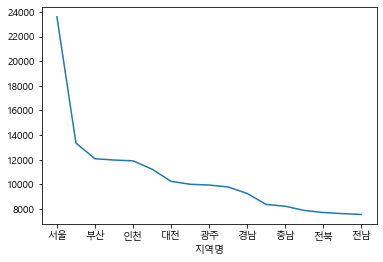

In [58]:
# 지역명으로 분양가격의 평균을 구하고 선그래프로 시각화 합니다.
df1 = df_last.groupby(['지역명'])['평당분양가격'].mean().sort_values(ascending=False)
df1.plot()

<AxesSubplot:xlabel='지역명'>

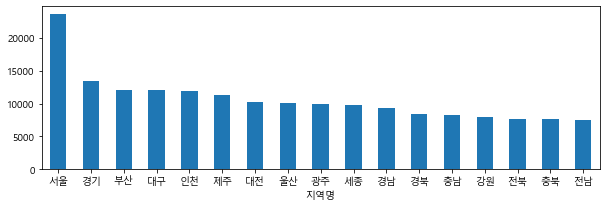

In [59]:
# 지역명으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.
# rot = x축의 index의 각도
# figsize = 그래프의 가로, 세로의 크기
df1.plot.bar(rot=0, figsize=(10,3))

<AxesSubplot:xlabel='지역명'>

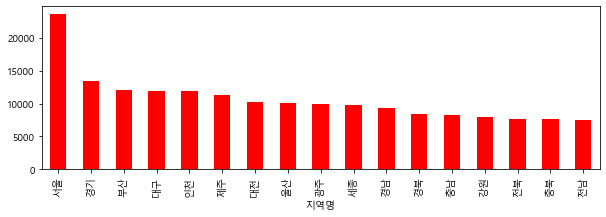

In [60]:
# x축의 인덱스가 90도로 세워져 세로의 모양을 하고 있음을 볼 수 있음
df1.plot.bar(rot=90, figsize=(10,3), color='red')

전용면적별 분양가격의 평균값을 구하고 그래프로 그려봅니다.

<AxesSubplot:xlabel='전용면적'>

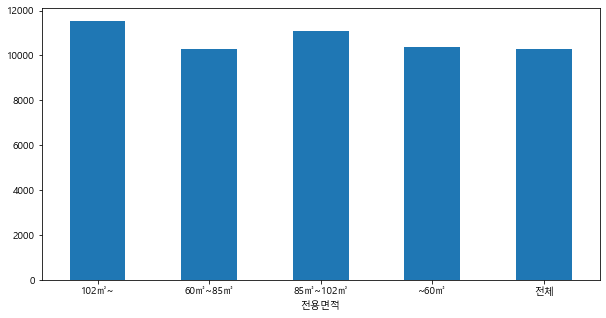

In [61]:
# 전용면적으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.
df2 = df_last.groupby(['전용면적'])['평당분양가격'].mean()
df2.plot.bar(rot=0, figsize=(10,5))

<AxesSubplot:xlabel='연도'>

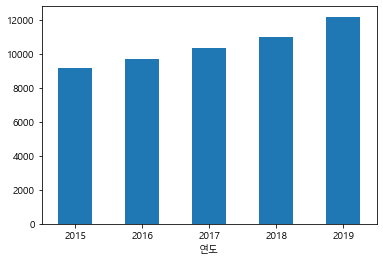

In [62]:
# 연도별 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.
df3 = df_last.groupby(['연도'])['평당분양가격'].mean()
df3.plot.bar(rot=0)

<AxesSubplot:xlabel='연도'>

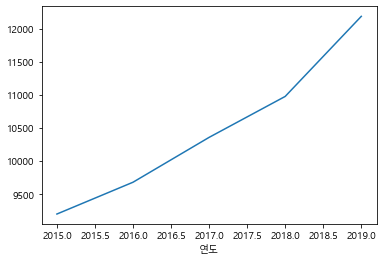

In [63]:
# 연도별 분양가격의 평균을 선 그래프로 시각화
df3.plot()

In [64]:
pd.DataFrame(df3)

,평당분양가격
연도,
2015,9202.735802
2016,9683.025000
2017,10360.487653
2018,10978.938411
2019,12188.293092


In [65]:
df3.index

Int64Index([2015, 2016, 2017, 2018, 2019], dtype='int64', name='연도')

In [66]:
# df3.plot?

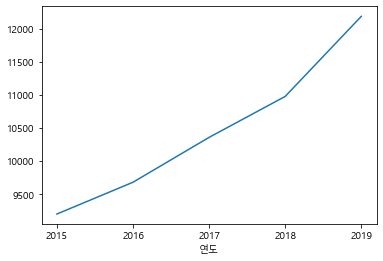

In [67]:
# 이때 연도의 소수값을 보고 싶지 않다면 
# 방법1 : ax.xaxis.set_major_locator를 이용하여 년도를 integer로 설정
from matplotlib.ticker import MaxNLocator

ax = plt.figure().gca()
df_last.groupby(['연도'])['평당분양가격'].mean().plot()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

<AxesSubplot:xlabel='연도'>

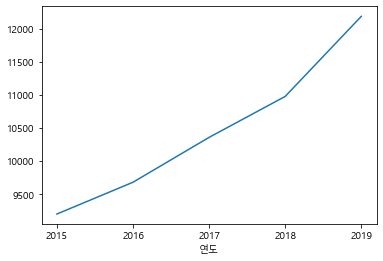

In [68]:
# 방법2 : 애초에 그래프를 그릴 때 x의 값을 설정해줌
fig = plt.figure()
ax = fig.add_subplot()

df3.plot(xticks = df3.index)

In [69]:
### 직접 그래프 그리기

'''df.plot(xticks, # x축 눈금 설정
        xlim,   # x축 범위 설정
        ylim,   # y축 범위 설정
        xlabel, # x축 제목(이름)
        ylabel, # y축 제목(이름)
        rot,    # x축,y축의 눈금의 회전 각도
        style,  # 선 종류
        kind,   # 그래프 종류(선 그래프가 default)
        marker, # 점 스타일
        title)  # 제목'''

'df.plot(xticks, # x축 눈금 설정\n        xlim,   # x축 범위 설정\n        ylim,   # y축 범위 설정\n        xlabel, # x축 제목(이름)\n        ylabel, # y축 제목(이름)\n        rot,    # x축,y축의 눈금의 회전 각도\n        style,  # 선 종류\n        kind,   # 그래프 종류(선 그래프가 default)\n        marker, # 점 스타일\n        title)  # 제목'

### box-and-whisker plot | diagram

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

* [상자 수염 그림 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC)
* 가공하지 않은 자료 그대로를 이용하여 그린 것이 아니라, 자료로부터 얻어낸 통계량인 5가지 요약 수치로 그린다.
* 5가지 요약 수치란 기술통계학에서 자료의 정보를 알려주는 아래의 다섯 가지 수치를 의미한다.


1. 최솟값
1. 제 1사분위수
1. 제 2사분위수( ), 즉 중앙값
1. 제 3 사분위 수( )
1. 최댓값

* Box plot 이해하기 : 
    * [박스 플롯에 대하여 :: -[|]- Box and Whisker](https://boxnwhis.kr/2019/02/19/boxplot.html)
    * [Understanding Boxplots – Towards Data Science](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

In [70]:
# index를 월, columns 를 연도로 구하고 평당분양가격 으로 pivot_table 을 구하고 상자수염그림을 그립니다.
df_last
df4 = pd.pivot_table(df_last, index='월', columns='연도', values='평당분양가격')

In [71]:
df4

연도,2015,2016,2017,2018,2019
월,,,,,
1,NaN,9334.029630,10095.132143,10719.148000,11535.540789
2,NaN,9361.440000,10110.885714,10766.668000,11574.793421
3,NaN,9423.276923,10107.428571,10905.488000,11610.094737
4,NaN,9601.993902,10217.232143,10920.728571,11777.876000
5,NaN,9602.396341,10358.819277,11087.485714,11976.394737
6,NaN,9676.042683,10431.618072,10921.928571,12401.884000
7,NaN,9700.551220,10549.536585,10868.376316,12424.852000
8,NaN,9719.023171,10564.869512,10811.147368,12523.896000
9,NaN,9737.656098,10583.601266,10915.257692,12527.571429


In [72]:
df4.columns

Int64Index([2015, 2016, 2017, 2018, 2019], dtype='int64', name='연도')

<AxesSubplot:>

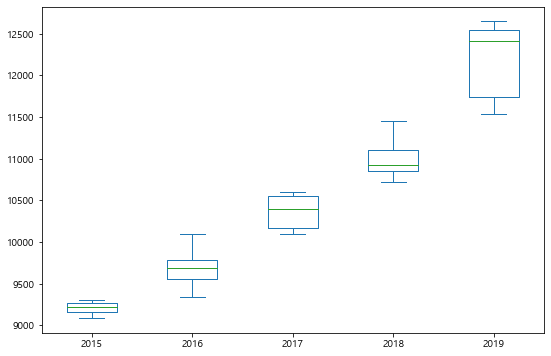

In [73]:
# boxplot
fig1 = plt.figure()
ax = fig1.add_subplot()

df4.plot(kind='box', ax=ax, figsize=(9,6))

In [74]:
# columns 에 "연도", "전용면적"을 추가해서 pivot_table 을 만들고 시각화 합니다.
df5 = pd.pivot_table(df_last,index='월',columns=['연도','전용면적'], values='평당분양가격')
df5

연도       2015                                                            2016  \
전용면적    102㎡~      60㎡~85㎡    85㎡~102㎡        ~60㎡           전체         102㎡~   
월                                                                               
1         NaN          NaN         NaN         NaN          NaN   9915.840000   
2         NaN          NaN         NaN         NaN          NaN   9861.060000   
3         NaN          NaN         NaN         NaN          NaN   9952.092857   
4         NaN          NaN         NaN         NaN          NaN  10282.181250   
5         NaN          NaN         NaN         NaN          NaN  10177.200000   
6         NaN          NaN         NaN         NaN          NaN  10181.118750   
7         NaN          NaN         NaN         NaN          NaN  10225.050000   
8         NaN          NaN         NaN         NaN          NaN  10355.193750   
9         NaN          NaN         NaN         NaN          NaN  10361.175000   
10    9631.82  8831.964706  9416.96250  8794.91250  8823.229412  10791.582353   
11    9932.78  8875.641176  9586.50000  8903.60625  8879.329412  11061.405882   
12    9947.08  8967.847059  9552.05625  9156.05625  8976.582353  11261.929412   

연도                                                         ...          2018  \
전용면적      60㎡~85㎡      85㎡~102㎡         ~60㎡           전체  ...         102㎡~   
월                                                          ...                 
1     9035.205882   9554.118750  9195.243750  9042.970588  ...  11220.220000   
2     9033.070588   9725.980000  9228.243750  9052.676471  ...  11243.100000   
3     9059.276471  10006.778571  9218.756250  9063.741176  ...  11320.320000   
4     9173.805882  10230.000000  9260.382353  9177.494118  ...  11125.840000   
5     9210.105882  10161.800000  9343.270588  9219.229412  ...  11536.800000   
6     9340.164706  10349.900000  9302.117647  9315.900000  ...  11101.907143   
7     9368.311765  10377.400000  9310.076471  9332.400000  ...  11079.750000   
8     9380.152941  10315.800000  9290.664706  9360.935294  ...  10994.185714   
9     9338.417647  10295.560000  9449.841176  9345.600000  ...  11529.540000   
10    9554.664706  10082.664706  9651.529412  9540.688235  ...  11827.860000   
11    9498.952941  10147.912500  9673.852941  9491.964706  ...  12028.940000   
12    9559.711765  10245.881250  9829.923529  9572.911765  ...  12261.040000   

연도                                                                  2019  \
전용면적       60㎡~85㎡      85㎡~102㎡         ~60㎡            전체        102㎡~   
월                                                                          
1     10160.505882  11286.000000  10839.40000  10362.776471  12322.64000   
2     10281.052941  11292.600000  10852.16000  10416.158824  12398.32000   
3     10430.717647  11505.600000  10970.74000  10568.347059  12491.38000   
4     10496.523529  11575.575000  11002.20000  10625.029412  12980.22000   
5     10641.141176  11727.100000  11027.98125  10741.888235  13371.80625   
6     10618.429412  11340.069231  11038.50000  10647.741176  13674.32000   
7     10617.264706  11624.376923  10628.20000  10579.217647  13533.91875   
8     10604.841176  11440.592308  10609.94000  10562.911765  13702.01250   
9     10813.905882  10983.814286  10539.54000  10749.652941  13854.01875   
10    10921.447059  11488.950000  10679.02000  10840.111765  13801.01250   
11    10986.476471  11495.078571  10827.91875  10904.364706  13873.40625   
12    11271.562500  11554.714286  11082.72000  11138.943750  13832.06000   

연도                                                            
전용면적       60㎡~85㎡      85㎡~102㎡          ~60㎡            전체  
월                                                             
1     11375.100000  11640.514286  11130.900000  11245.575000  
2     11394.075000  11667.150000  11190.520000  11262.900000  
3     11456.156250  11644.050000  11161.920000  11328.281250  
4     11505.037500  11777.464286  11243.807143  11391.187500  
5

In [75]:
# pd.pivot_table?

<AxesSubplot:>

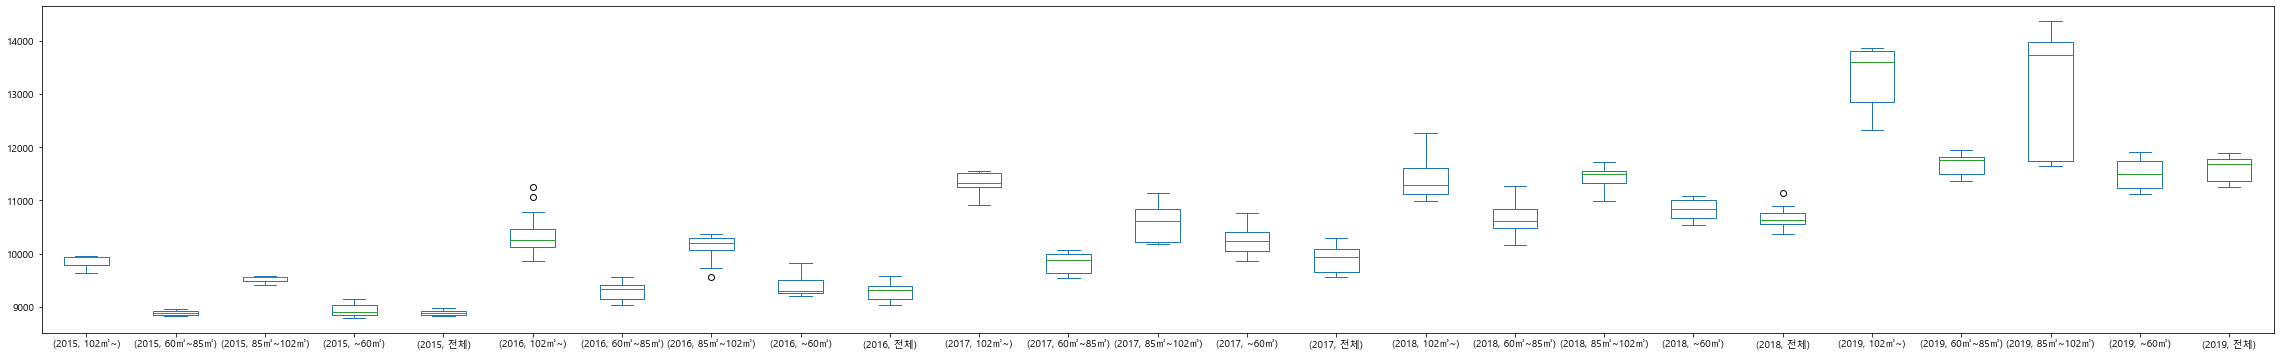

In [76]:
# 시각화
fig = plt.figure()
ax = fig.add_subplot()

df5.plot(kind='box', ax = ax, figsize=(40,6))

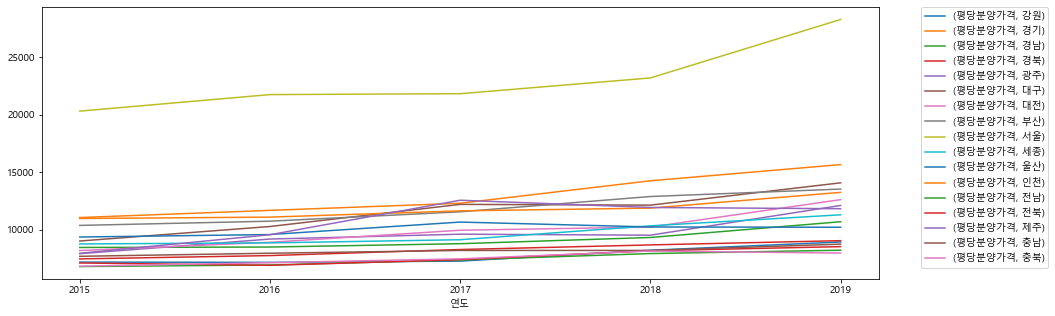

In [77]:
# index를 연도, columns 를 지역명으로 구하고 평당분양가격 으로 pivot_table 을 구하고 선그래프를 그립니다.
df6 = pd.pivot_table(df_last, index='연도', columns='지역명', values=['평당분양가격'])
df6.plot(figsize=(15,5))
plt.xticks(ticks = [2015,2016,2017,2018,2019])

# bbox_to_anchor - 그래프의 가로 끝(왼쪽에서 오른쪽으로), 그래프의 세로 끝(아래에서 위로) = (1,1) = (제일 오른쪽, 제일 위쪽)
# borderaxespad - 축과 범례 테두리 사이의 공간(default=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



### Seaborn 으로 시각화 해보기

In [78]:
# 라이브러리 로드하기
import seaborn as sns

# 브라우저 내부에서 바로 그래프 결과를 보여주게 하는 코드
%matplotlib inline

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

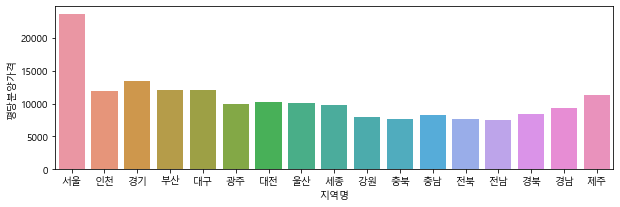

In [79]:
# barplot으로 지역별 평당분양가격을 그려봅니다.
# sns에서 ci를 통해서 오차 범위의 표시 여부를 조정할 수 있다.(default=표시함)
plt.figure(figsize=(10,3))
sns.barplot(data=df_last, x='지역명', y='평당분양가격',ci=None)


<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

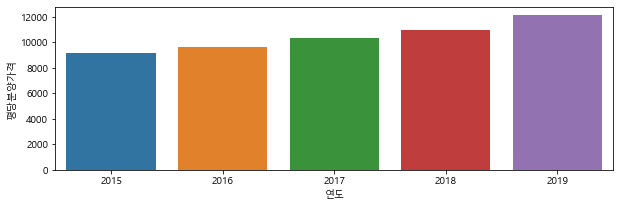

In [80]:
# barplot으로 연도별 평당분양가격을 그려봅니다.
plt.figure(figsize=(10,3))
sns.barplot(data = df_last, x='연도', y='평당분양가격', ci=None)


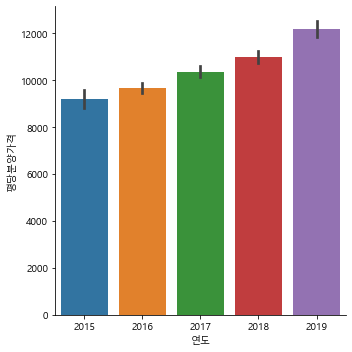

In [81]:
# catplot 으로 서브플롯 그리기
# 카테고리별 시각화
# col_wrap = 가로에 배치할 그래프의 개수
# col = groupby를 한번 더 나눠 진행한다고 생각하면 될 듯 하다.
sns.catplot(data=df_last, x='연도', y='평당분양가격', kind='bar')

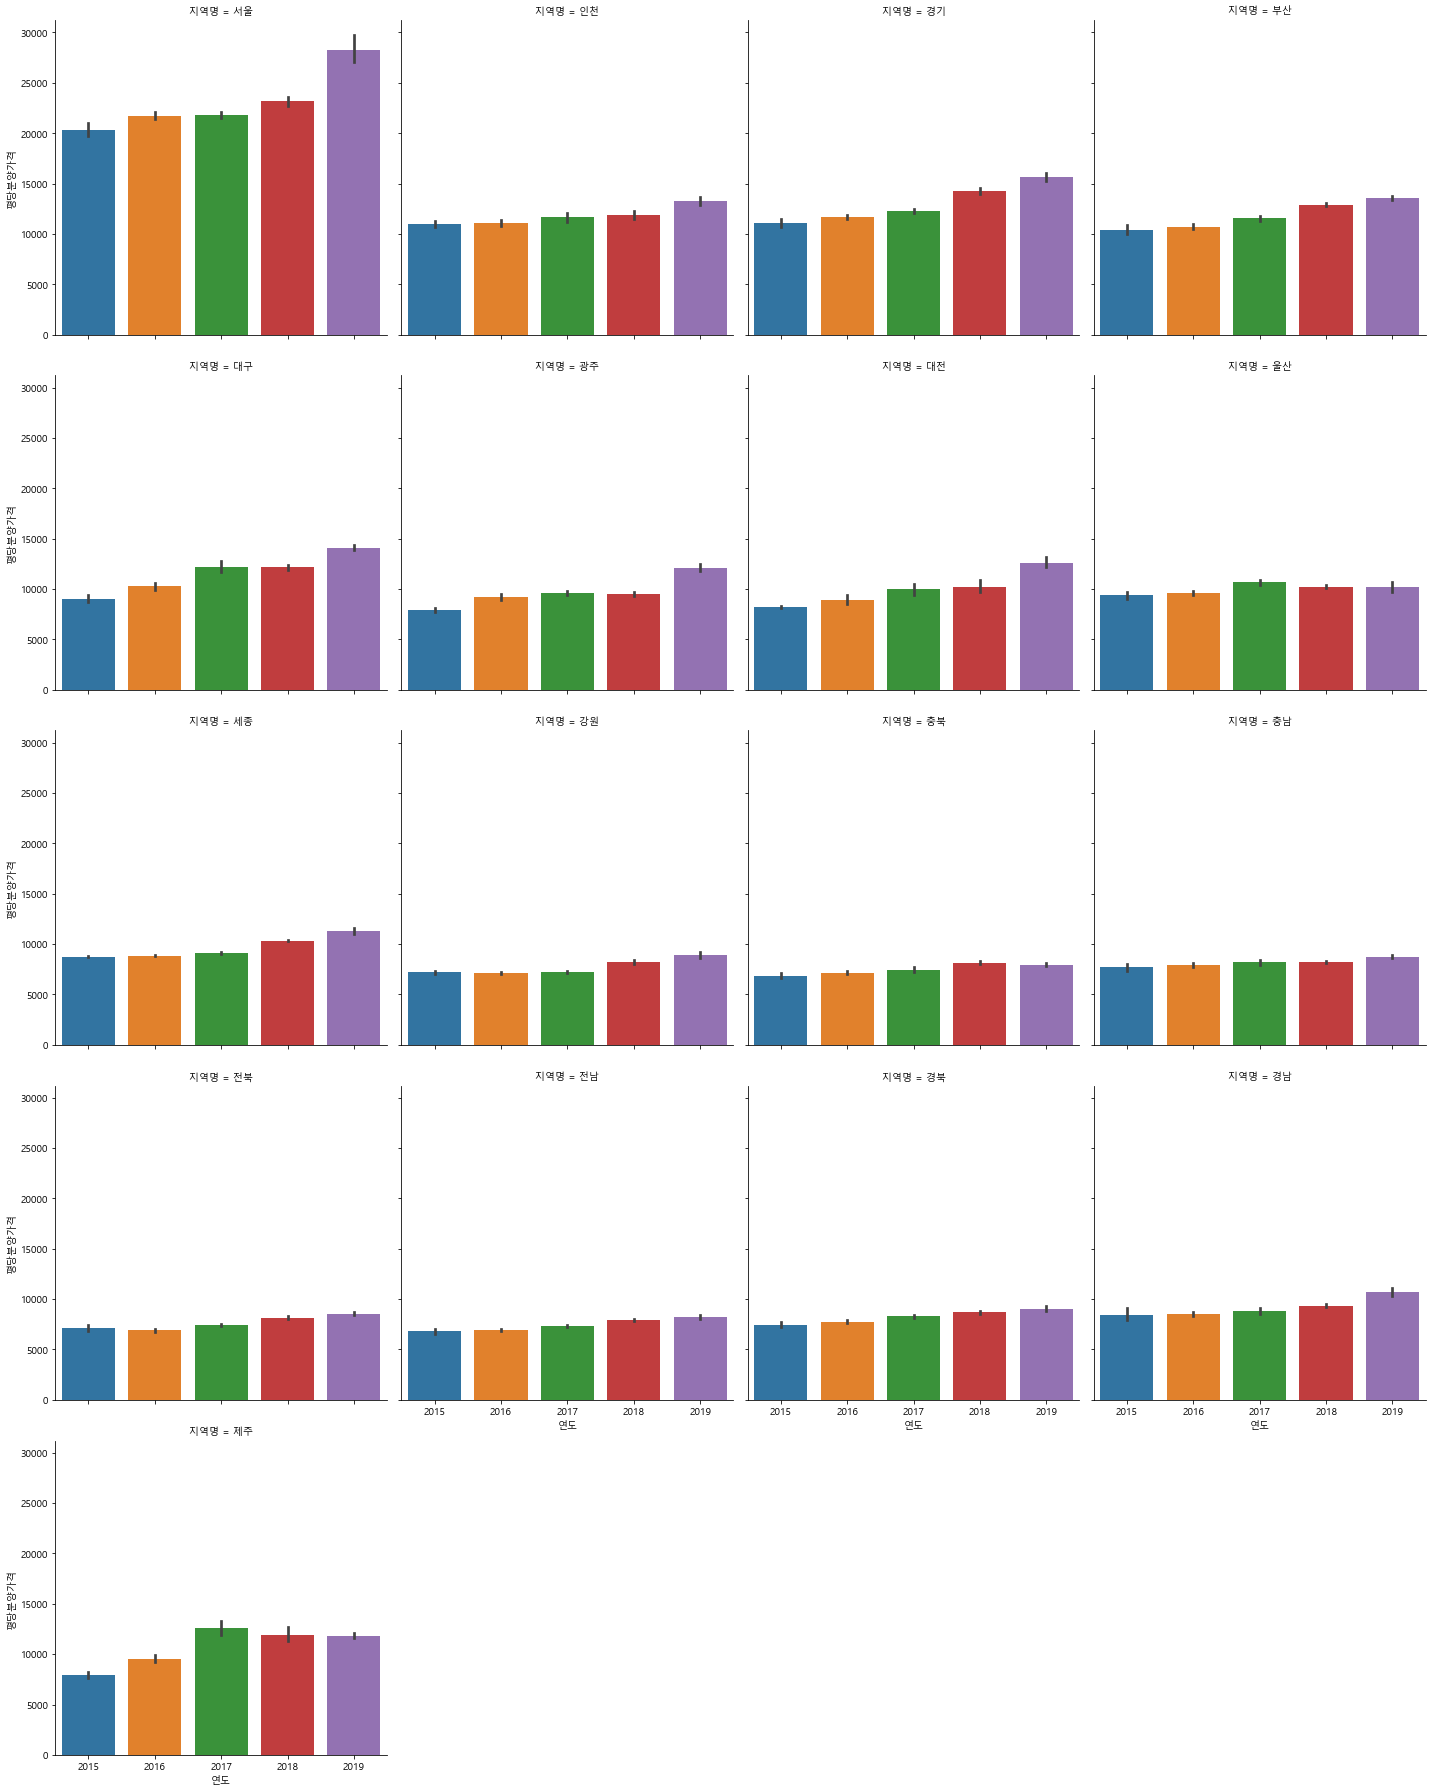

In [82]:
# 전체 평균이 아닌 원래부터 평당분양가격이 눈에 띄게 높았던 서울의 데이터만
# groupby가 되었기 때문에 위의 최대 y 12000정도에서 30000까지 눈에 띄게 ylim이 커진 모습
sns.catplot(data=df_last, x='연도', y='평당분양가격', kind='bar', col='지역명', col_wrap=4)


https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

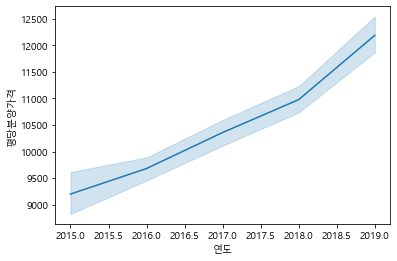

In [83]:
# lineplot으로 연도별 평당분양가격을 그려봅니다.
# hue 옵션을 통해 지역별로 다르게 표시해 봅니다.
sns.lineplot(data=df_last, x='연도', y='평당분양가격')


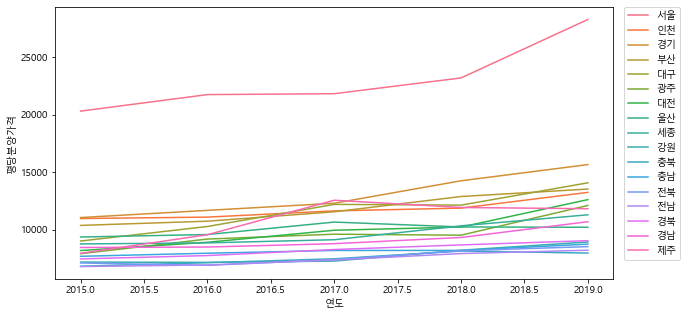

In [84]:
# hue를 이용해 변수의 다른 값에 따라 다른 색깔의 그래프를 그릴 수 있다.
plt.figure(figsize=(10,5))
sns.lineplot(data=df_last, x='연도', y='평당분양가격', hue='지역명', ci=None)
plt.legend(bbox_to_anchor=(1.02,1), loc=2, borderaxespad=0.)

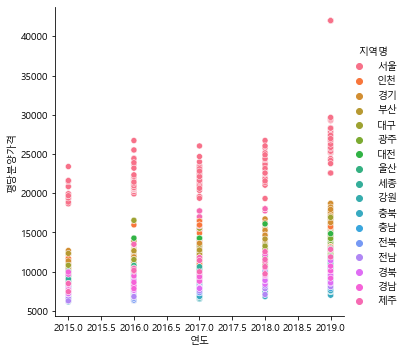

In [85]:
# relplot 으로 서브플롯 그리기
# relplot은 scatter과 line plot의 상위 개념으로 default가 scatter이며 kind 옵션을 통해 line과 scatter를 조절 가능
sns.relplot(data=df_last, x = '연도', y='평당분양가격', hue='지역명', ci=None)


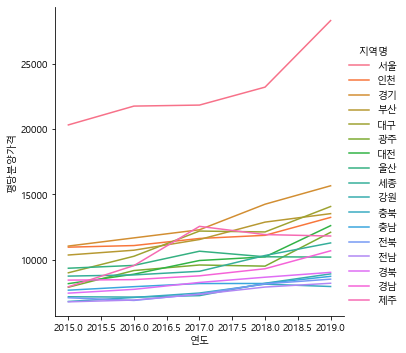

In [86]:
sns.relplot(data=df_last, x = '연도', y='평당분양가격', hue='지역명', ci=None, kind='line')

<Figure size 2160x2160 with 0 Axes>

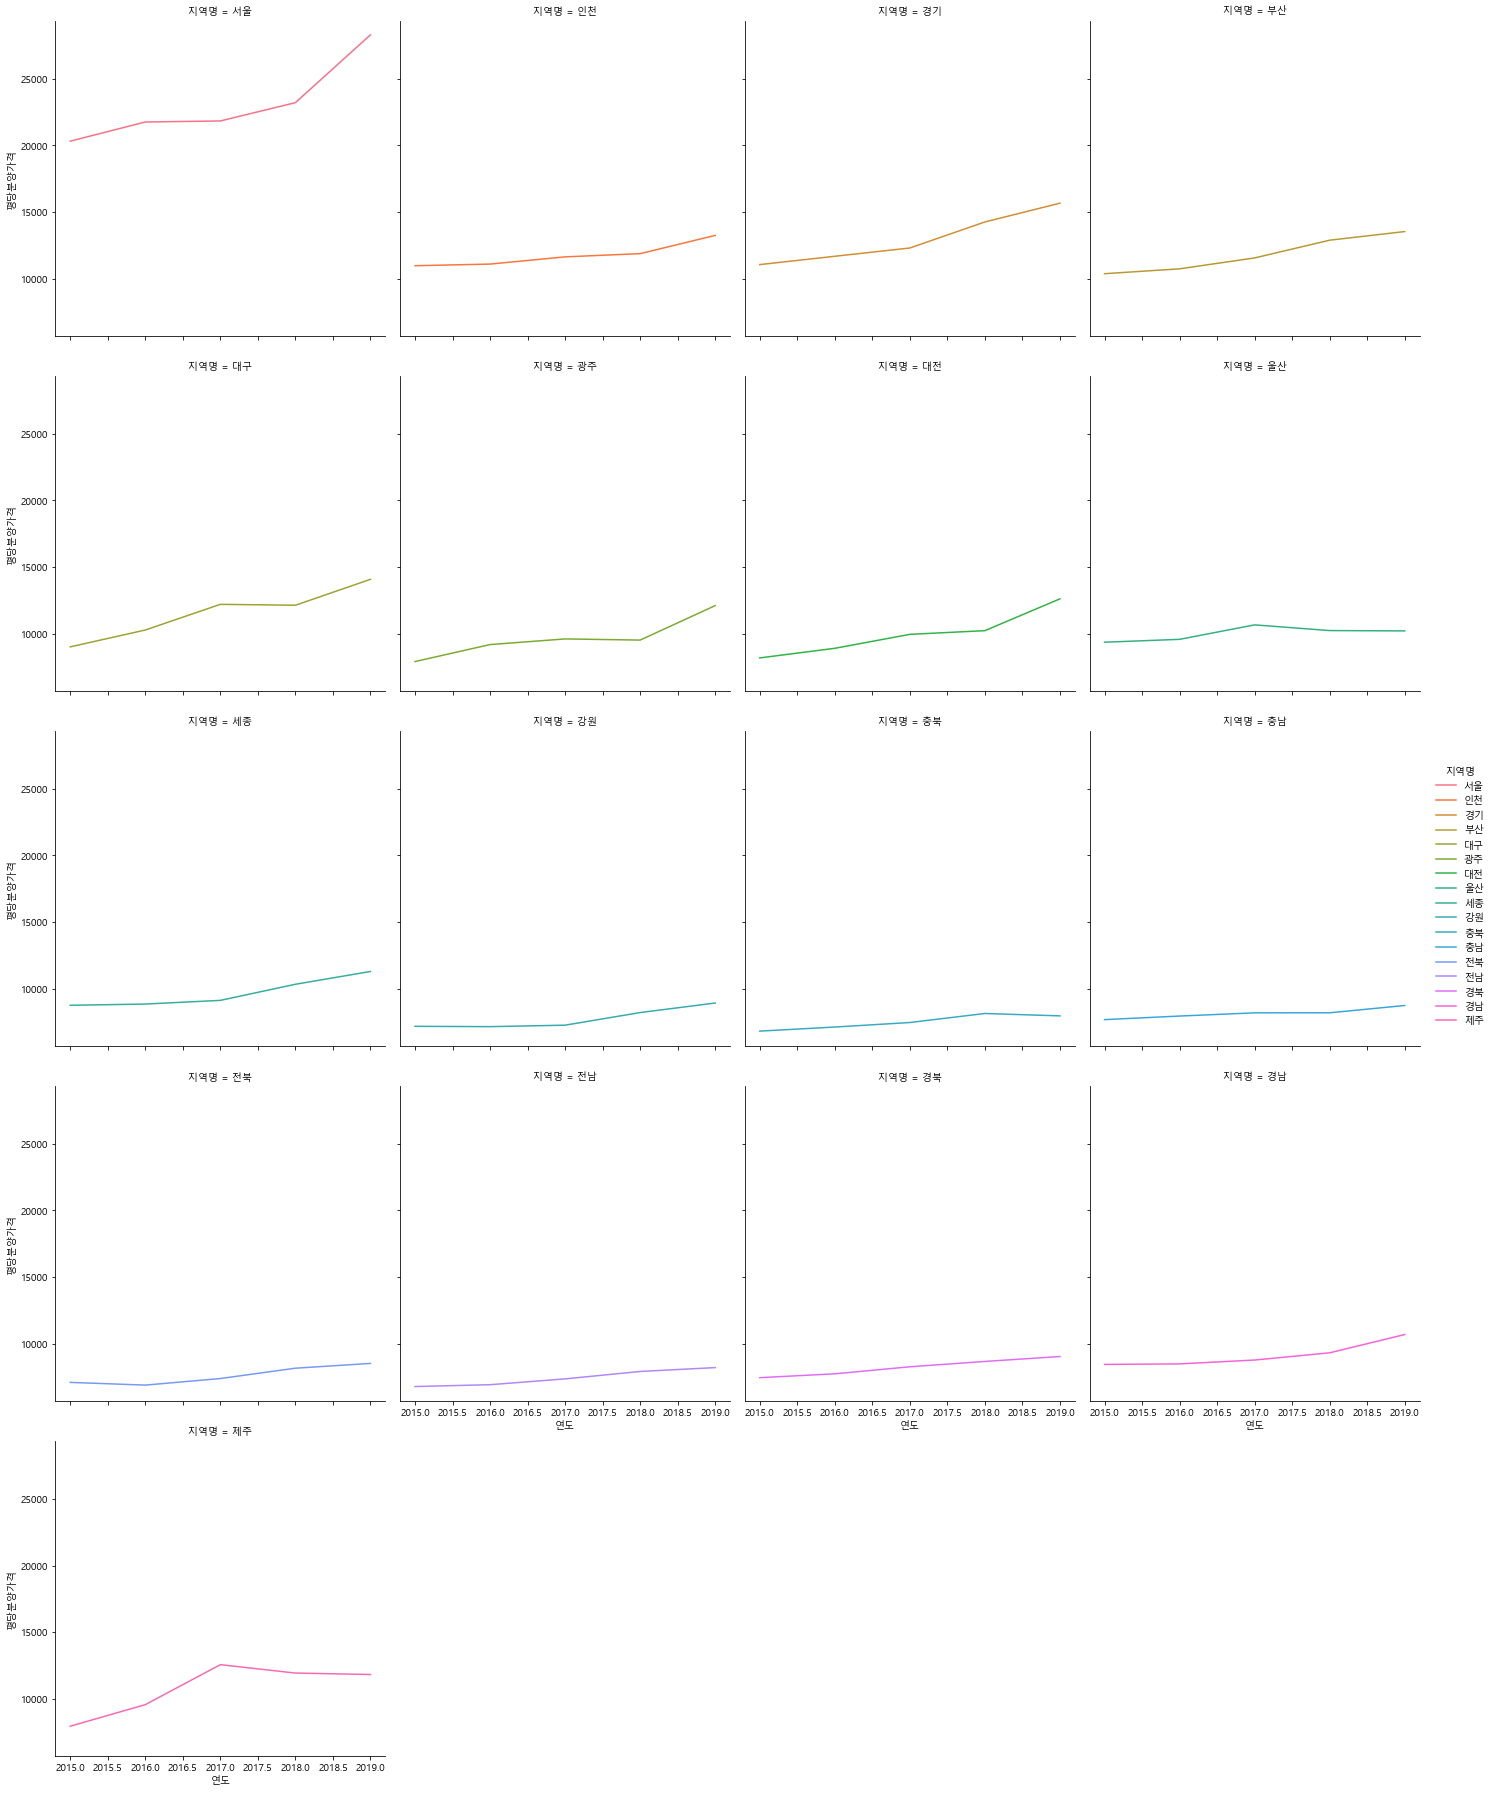

In [87]:
plt.figure(figsize=(30,30))
sns.relplot(data=df_last, x = '연도', y='평당분양가격', hue='지역명', ci=None, col='지역명', col_wrap=4, kind='line')

### boxplot과 violinplot

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

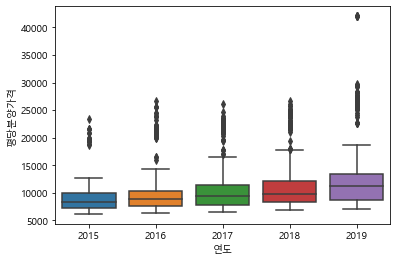

In [88]:
# 연도별 평당분양가격을 boxplot으로 그려봅니다.
# 최솟값
# 제 1사분위수
# 제 2사분위수( ), 즉 중앙값
# 제 3 사분위 수( )
# 최댓값
sns.boxplot(data=df_last, x='연도', y='평당분양가격')


<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

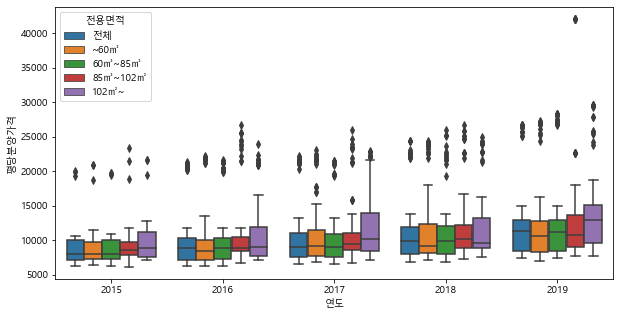

In [89]:
# hue옵션을 주어 전용면적별로 다르게 표시해 봅니다.
plt.figure(figsize=(10,5))
sns.boxplot(data=df_last, x='연도', y='평당분양가격', hue='전용면적')



<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

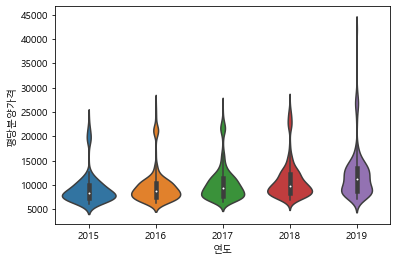

In [90]:
# 연도별 평당분양가격을 violinplot으로 그려봅니다.
# violinplot 박스플롯과 유사한 형태지만 확률밀도함수의 형태도 같이 출력해준다.
sns.violinplot(data=df_last, x='연도', y='평당분양가격')


<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

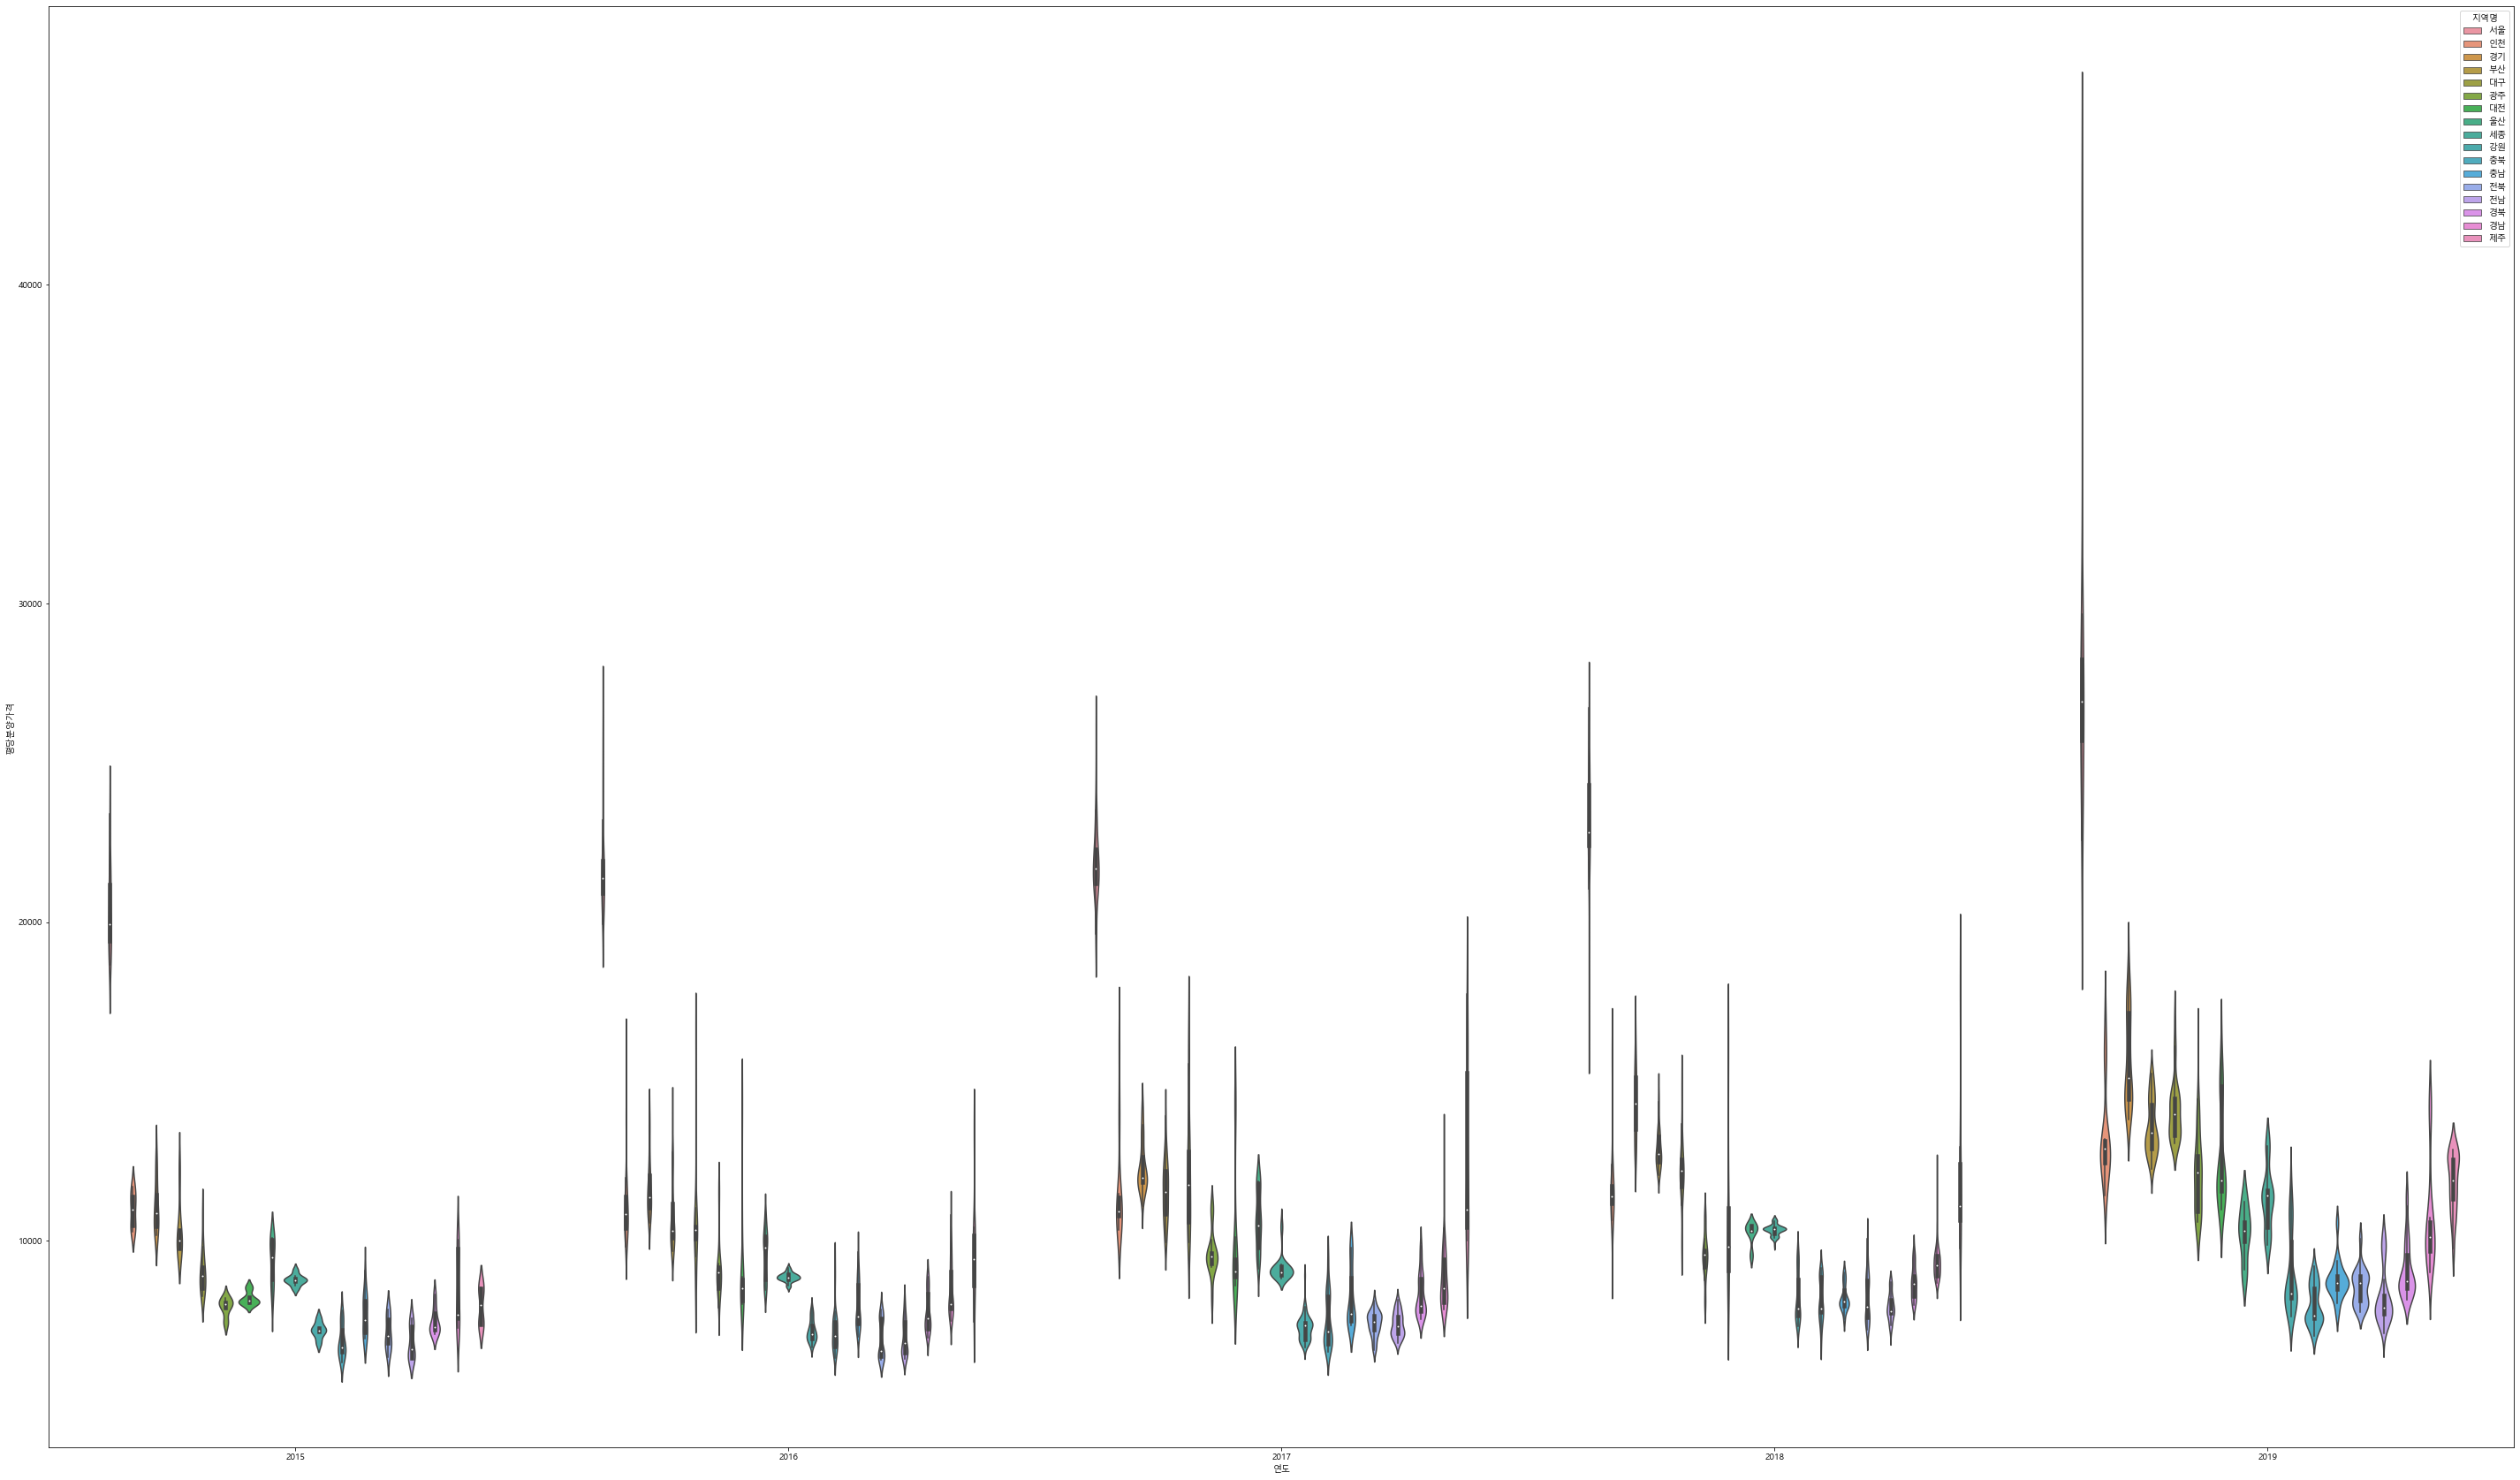

In [91]:
plt.figure(figsize=(50,30))
sns.violinplot(data=df_last, x='연도', y='평당분양가격', hue='지역명')

### lmplot과 swarmplot 

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

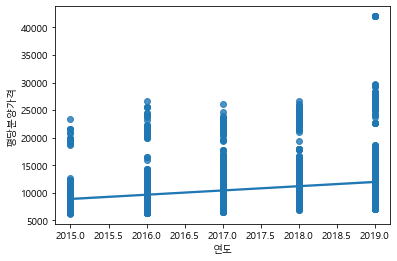

In [92]:
# regplot = 회귀분석(regression)을 진행한뒤 회귀선과 함께 산점도를 출력해 줌
sns.regplot(data=df_last, x='연도', y='평당분양가격')

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

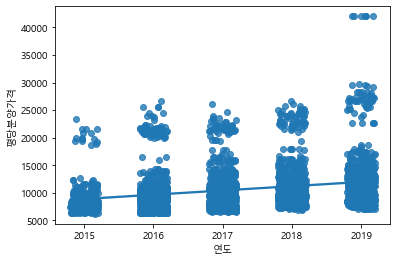

In [93]:
# x(y)_jitter = 지정한 크기의 랜덤한 노이즈를 x(y)에 추가, 원본이 아닌 산점도에만 영향을 끼치며 이산형 값 표현에 유용할 수 있다.
sns.regplot(data=df_last, x='연도', y='평당분양가격', x_jitter=.2)

In [94]:
# regplot은 col을 통해 추가적인 gruopby 그래프를 그리는 것이 불가 = 따라서 lmplot 사용

# sns.regplot(data=df_last, x='연도',y='평당분양가격',col='지역명',col_wrap=4)

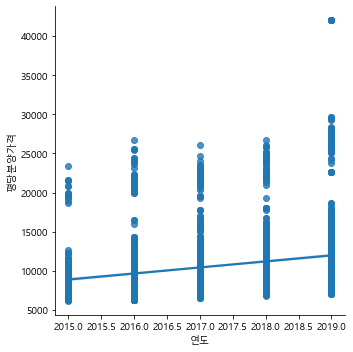

In [95]:
# 연도별 평당분양가격을 lmplot으로 그려봅니다. 
# lmplot = regplot과 FacetGrid가 결합한 plot 
# FacetGrid = 다중 그래프를 그리기 위한 옵션들 
sns.lmplot(data=df_last, x='연도', y='평당분양가격')

# 추가 변수를 추가하지 않았으므로 regplot과 결과가 같음


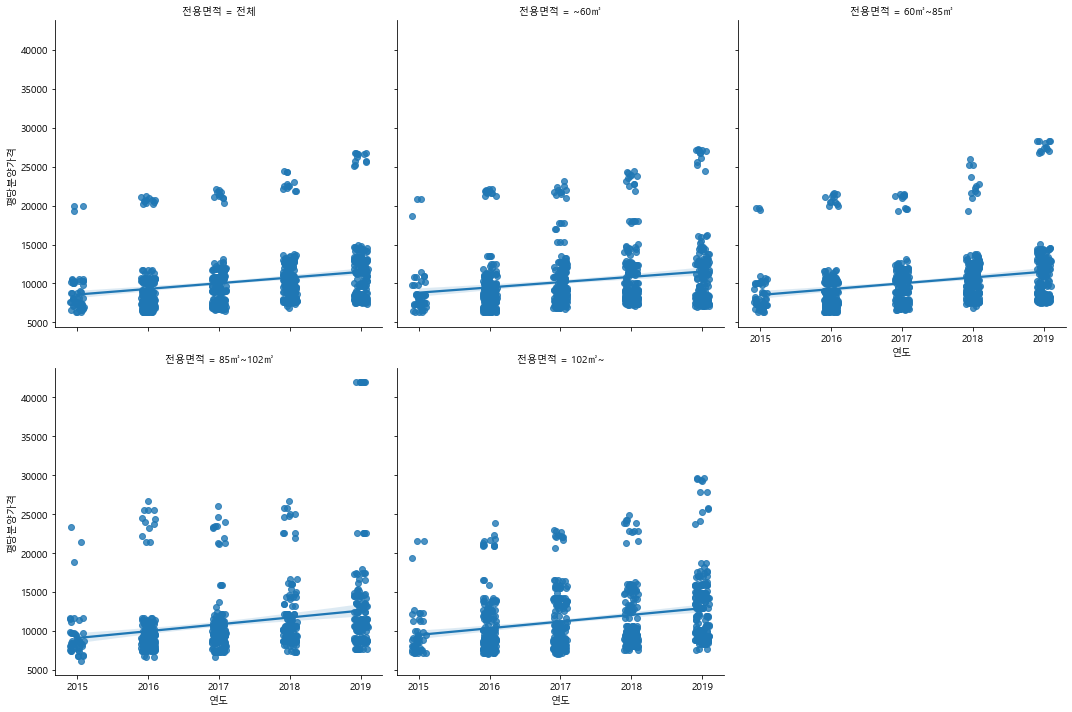

In [96]:
# 위에서 사용이 불가했던 col 옵션과
# hue 옵션으로 전용면적을 표현해 봅니다.
sns.lmplot(data=df_last, x='연도',y='평당분양가격',col='전용면적',col_wrap=3, x_jitter=.1)

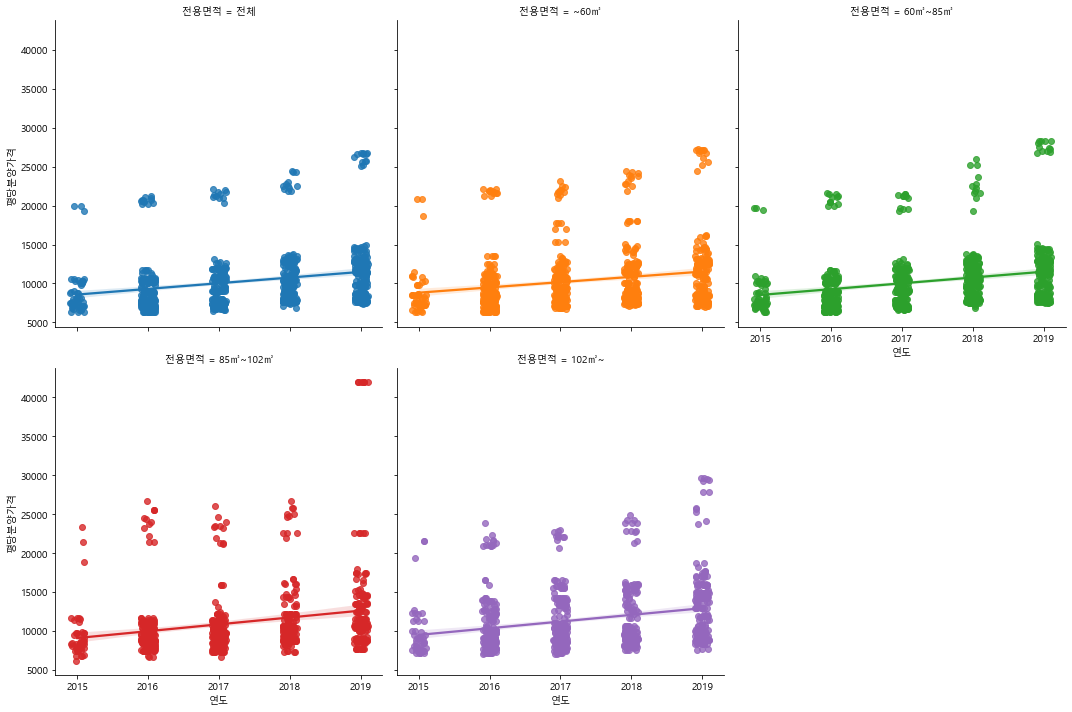

In [97]:
sns.lmplot(data=df_last, x='연도', y='평당분양가격', col='전용면적', hue='전용면적', col_wrap=3, x_jitter=.1)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 71.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 61.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 62.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 59.0% of the points

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

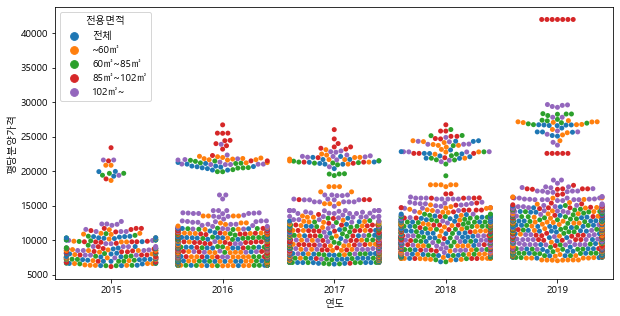

In [98]:
# 연도별 평당분양가격을 swarmplot 으로 그려봅니다. 
# swarmplot은 범주형(카테고리) 데이터의 산점도를 표현하기에 적합합니다.
plt.figure(figsize=(10,5))
sns.swarmplot(data=df_last,x='연도',y='평당분양가격', hue='전용면적')


<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

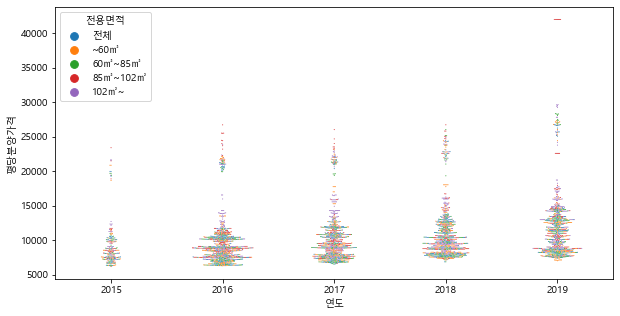

In [99]:
plt.figure(figsize=(10,5))
sns.swarmplot(data=df_last,x='연도',y='평당분양가격', hue='전용면적', size=1)

### 이상치 보기

In [100]:
# 평당분양가격의 최대값을 구해서 max_price 라는 변수에 담습니다.
max_price = df_last['평당분양가격'].max()

In [101]:
max_price

42002.399999999994

In [102]:
# 서울의 평당분양가격이 특히 높은 데이터가 있습니다. 해당 데이터를 가져옵니다.
df_last[df_last['평당분양가격']==max_price]


,지역명,연도,월,평당분양가격,전용면적
3743,서울,2019,6,42002.4,85㎡~102㎡
3828,서울,2019,7,42002.4,85㎡~102㎡
3913,서울,2019,8,42002.4,85㎡~102㎡
3998,서울,2019,9,42002.4,85㎡~102㎡
4083,서울,2019,10,42002.4,85㎡~102㎡
4168,서울,2019,11,42002.4,85㎡~102㎡
4253,서울,2019,12,42002.4,85㎡~102㎡


### 수치데이터 히스토그램 그리기

distplot은 결측치가 있으면 그래프를 그릴 때 오류가 납니다. 
따라서 결측치가 아닌 데이터만 따로 모아서 평당분양가격을 시각화하기 위한 데이터를 만듭니다.
데이터프레임의 .loc를 활용하여 결측치가 없는 데이터에서 평당분양가격만 가져옵니다.

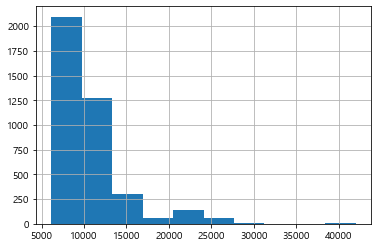

In [103]:
# bins = 히스토그램의 막대 개수(default=10)
h = df_last['평당분양가격'].hist(bins=10)

In [104]:
# 결측치가 없는 데이터에서 평당분양가격만 가져옵니다. 그리고 price라는 변수에 담습니다.
# .loc[행]
# .loc[행, 열]

price = df_last.loc[df_last['평당분양가격'].notnull(),'평당분양가격']

In [105]:
# 방법2
price = df_last[df_last.isnull()['평당분양가격']==False]['평당분양가격']

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='평당분양가격', ylabel='Density'>

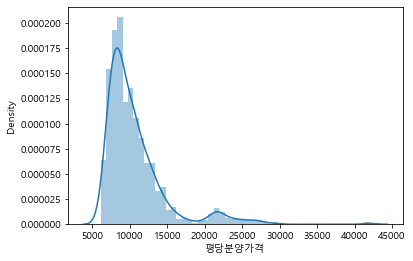

In [106]:
# distplot으로 평당분양가격을 표현해 봅니다.
# distplot = kde + hist + rug
# hist(matplotlib)와 달리 bins의 default가 없고 보기 좋게 알아서 설정해줌(default)
# distplot은 히스토그램과 kde(파란 선)을 기본적으로 같이 출력한다
# distplot은 Series나 1차원 배열, 리스트 이외의 데이터를 받을 수 없다.
# kde = 밀도를 나타내는 그래프 = 옵션으로 없앨 수 있다.(False)
sns.distplot(price)


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='평당분양가격'>

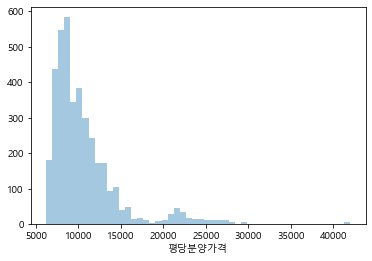

In [107]:
sns.distplot(price, kde=False)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='평당분양가격'>

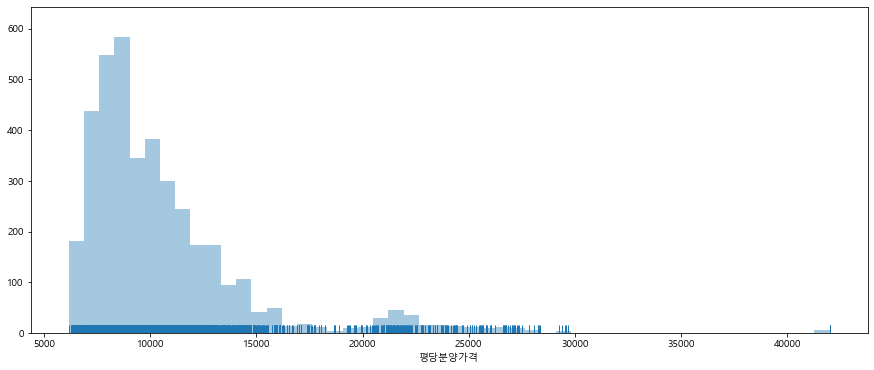

In [108]:
# rug를 통해서 실제 데이터의 위치를 표시할수도 있다.
plt.figure(figsize=(15,6))
sns.distplot(price, rug = True, kde = False)

<AxesSubplot:xlabel='평당분양가격', ylabel='Density'>

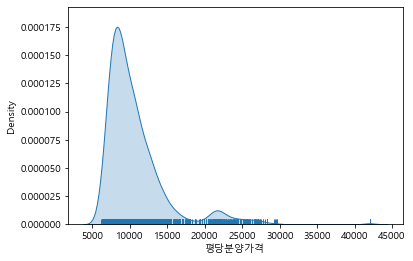

In [109]:
# kde의 경우 shade를 통해서 그래프 안쪽을 색칠 가능
sns.kdeplot(price, shade = True)
sns.rugplot(price)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='평당분양가격', ylabel='Density'>

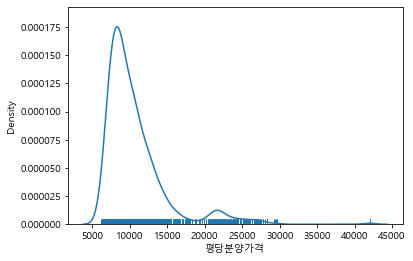

In [110]:
# sns.distplot(price, hist=False, rug=True)
sns.distplot(price, hist = False, rug = True)

# distplot을 쓰면서 뜨는 메세지는 추후 파이썬 업데이트 시 distplot의 기능 삭제를 미리 알려주어 혼란을 방지하기 위함

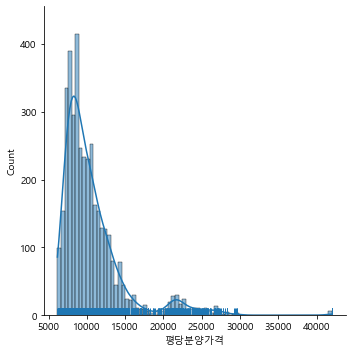

In [111]:
# displot은 distplot + FacetGrid
# distplot은 데이터 열을 통해 바로 가져오지만 displot은 데이터 자체를 가져올 수 있음.
sns.displot(price, kde=True, rug=True)

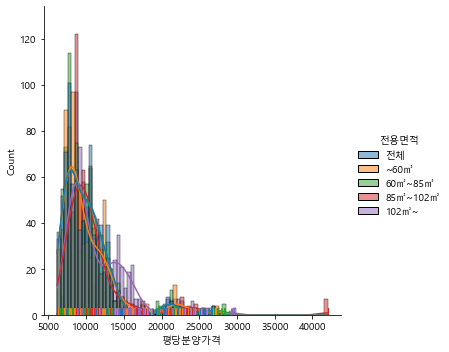

In [112]:
sns.displot(data=df_last, x="평당분양가격", kde=True, rug=True, hue="전용면적")

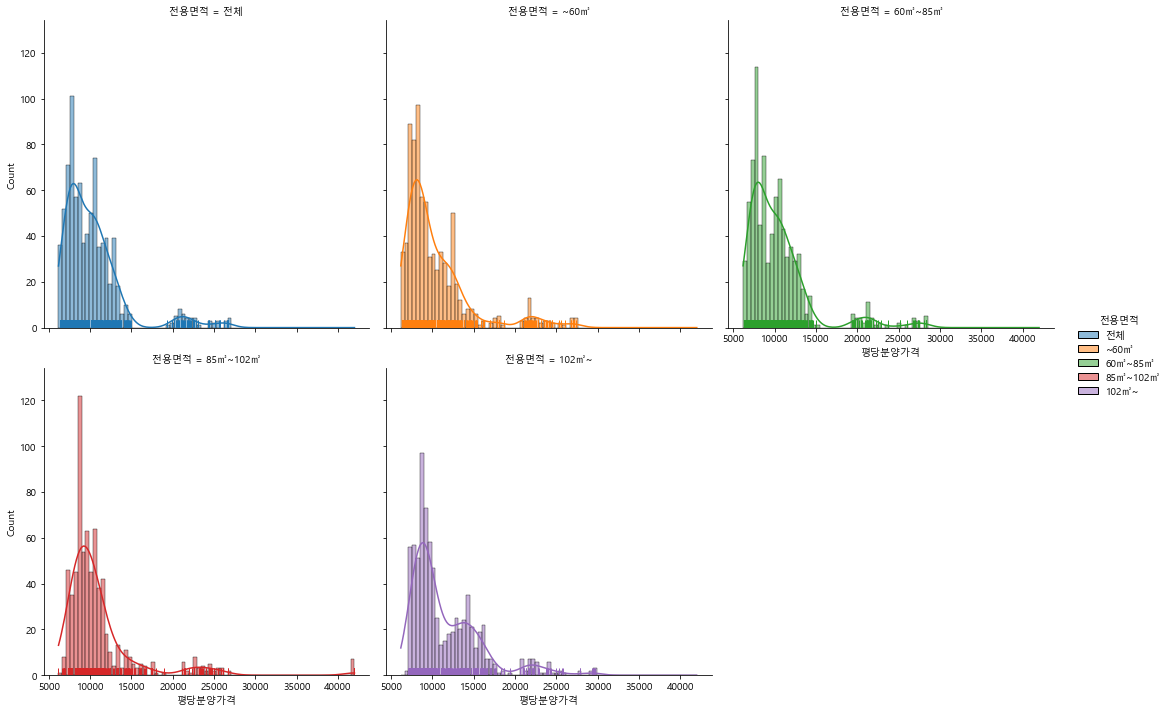

In [113]:
sns.displot(data=df_last, x="평당분양가격", kde=True, rug=True, hue="전용면적", col='전용면적', col_wrap=3)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Figure size 720x576 with 0 Axes>

c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


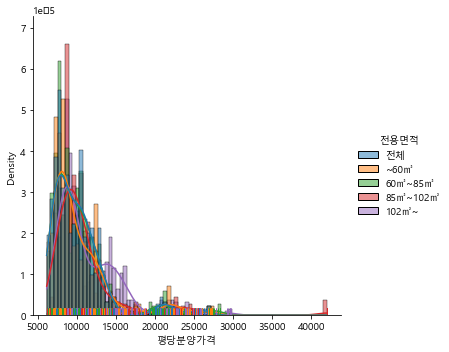

In [114]:
# y축을 count가 아닌 density로 바꾸고 싶다면 stat 설정
plt.figure(figsize=(10,8))
sns.displot(data=df_last, x="평당분양가격", kde=True, rug=True, hue="전용면적", stat='density')

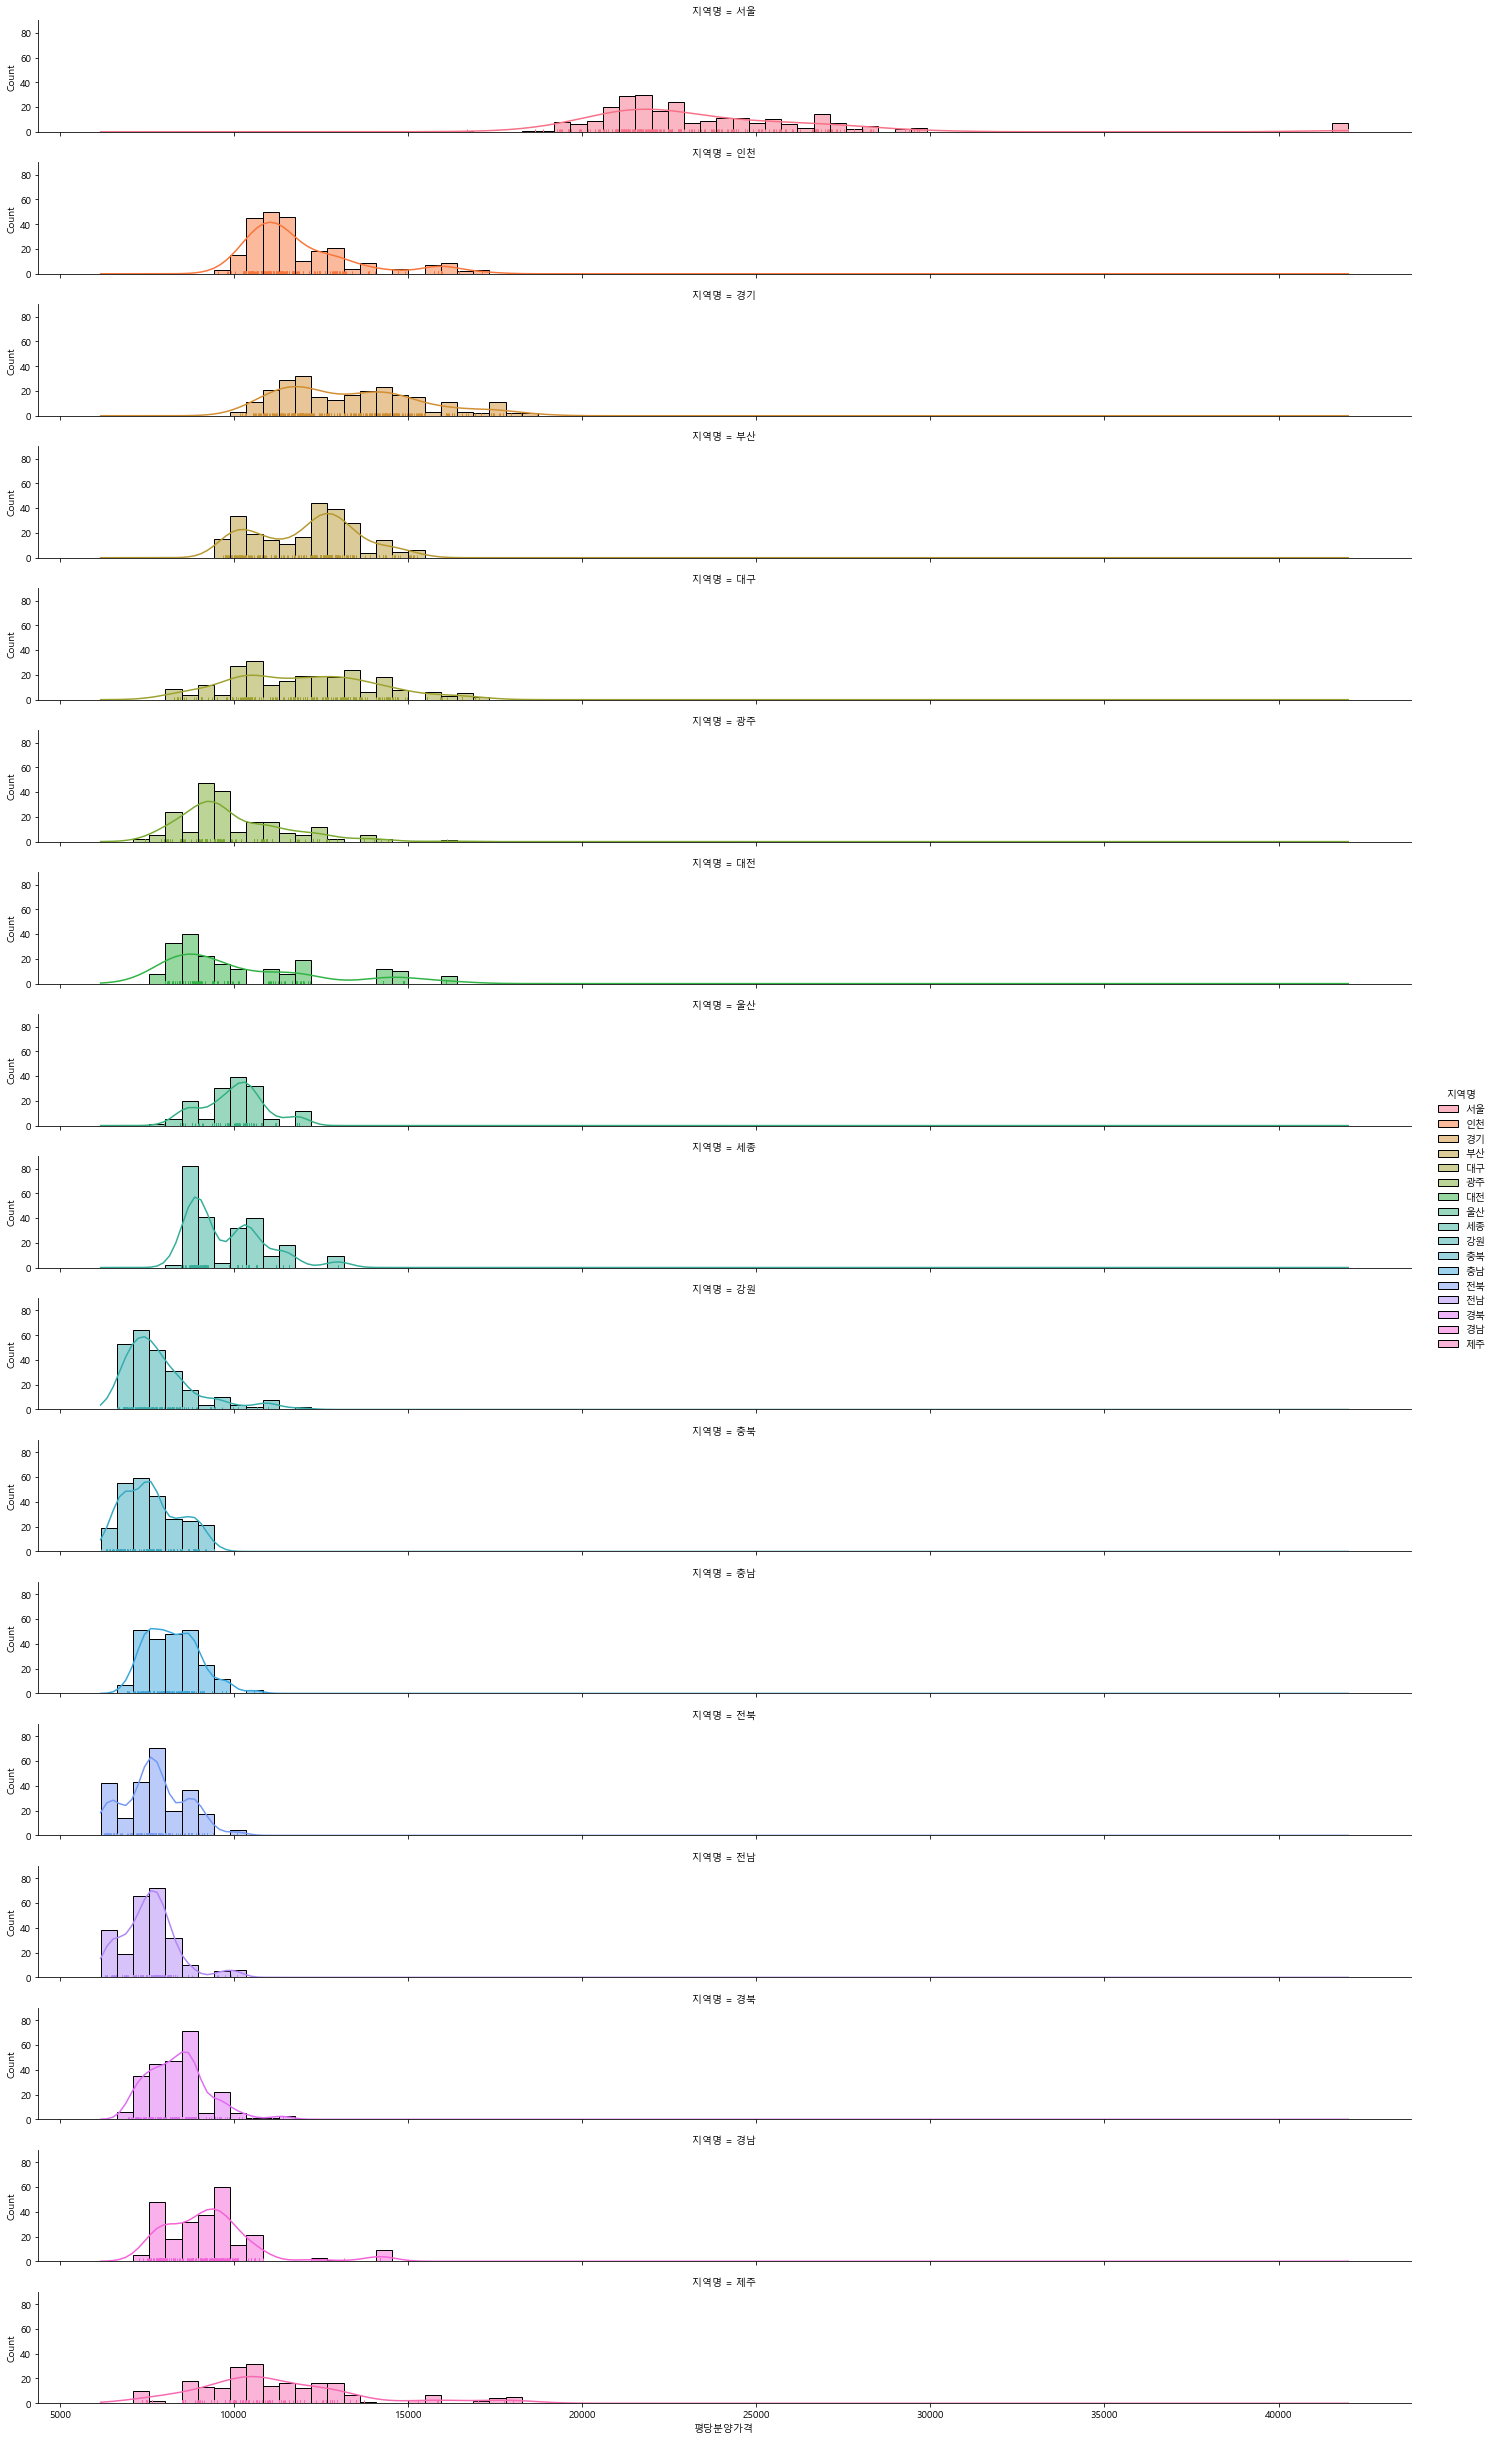

In [115]:
# aspect(가로=너비), height(높이=세로)로 크기 조절 가능
# aspect * height 의 인치로 크기를 제공
sns.displot(data=df_last, x="평당분양가격", kde=True, rug=True,
            hue="지역명", col="지역명", col_wrap=1, aspect=10, height=2)

* distplot을 산마루 형태의 ridge plot으로 그리기
* https://seaborn.pydata.org/tutorial/axis_grids.html#conditional-small-multiples
* https://seaborn.pydata.org/examples/kde_ridgeplot.html

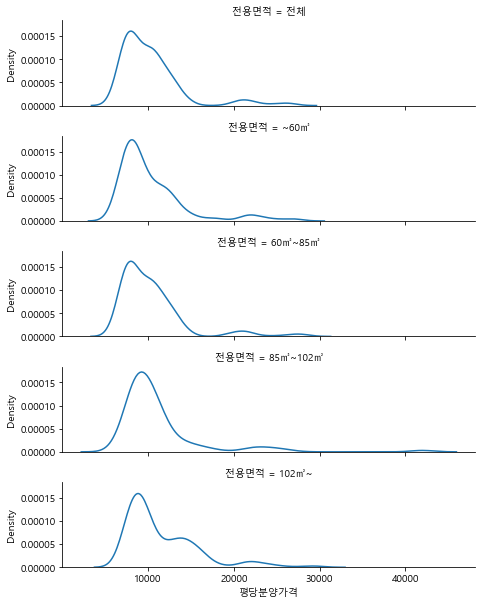

In [116]:
# subplot 으로 표현해 봅니다.
g = sns.FacetGrid(df_last, row="전용면적",
                  height=1.7, aspect=4,)

g.map(sns.kdeplot, "평당분양가격")

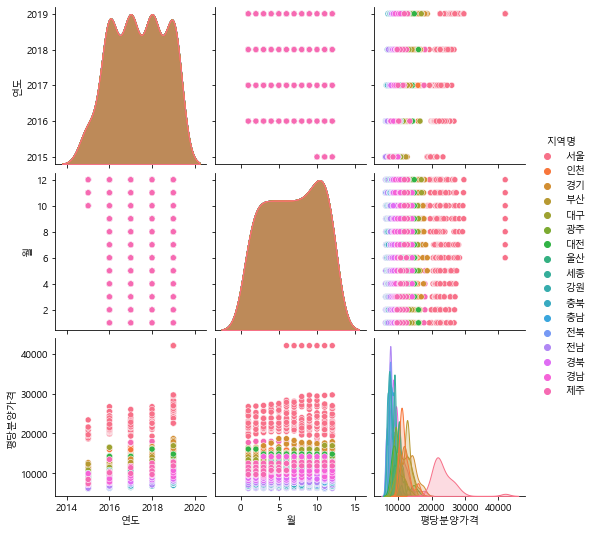

In [117]:
# pairplot
# 모든 변수간의 관계를 시각화
# long 형식의 데이터를 받는다.
# pallete를 통해 색상 조정이 가능하고 vars를 이용해서 모든 변수가 아닌 지정 변수끼리의 관계를 볼 수 있다.

sns.pairplot(df_last, hue='지역명', dropna=False)


In [118]:
# 규모구분(전용면적)별로 value_counts를 사용해서 데이터를 집계해 봅니다.
df_last['전용면적'].value_counts()


전체          867
~60㎡        867
60㎡~85㎡     867
85㎡~102㎡    867
102㎡~       867
Name: 전용면적, dtype: int64

## 2015년 8월 이전 데이터 보기

In [119]:
# 모든 컬럼이 출력되게 설정합니다.
pd.options.display.max_columns = None

# 모든 줄이 출력되게 설정합니다.
pd.options.display.max_rows = None

df_first


,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231
5,대전,8321,8321,8321,8341,8341,8341,8333,8333,8333,8048,8038,8067,8067,8067,8067,8067,8145,8272,8079,8079,8079
6,울산,8090,8090,8090,8153,8153,8153,8153,8153,8493,8493,8627,8891,8891,8526,8526,8629,9380,9192,9190,9190,9215
7,경기,10855,10855,10791,10784,10876,10646,10266,10124,10134,10501,10397,10356,10379,10391,10355,10469,10684,10685,10573,10518,10573
8,세종,7601,7600,7532,7814,7908,7934,8067,8067,8141,8282,8527,8592,8560,8560,8560,8555,8546,8546,8671,8669,8695
9,강원,6230,6230,6230,6141,6373,6350,6350,6268,6268,6419,6631,6365,6365,6348,6350,6182,6924,6846,6986,7019,7008


In [120]:
# head 로 미리보기를 합니다.
df_first.head()


,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [121]:
# df_first 변수에 담겨있는 데이터프레임의 정보를 info를 통해 봅니다.
df_first.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [122]:
# 결측치가 있는지 봅니다.
df_first.isnull().sum()


지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

### melt로 Tidy data 만들기
pandas의 melt를 사용하면 데이터의 형태를 변경할 수 있습니다. 
df_first 변수에 담긴 데이터프레임은 df_last에 담겨있는 데이터프레임의 모습과 다릅니다. 
같은 형태로 만들어주어야 데이터를 합칠 수 있습니다. 
데이터를 병합하기 위해 melt를 사용해 열에 있는 데이터를 행으로 녹여봅니다.

* https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-melt
* [Tidy Data 란?](https://vita.had.co.nz/papers/tidy-data.pdf)

In [123]:
# head 로 미리보기 합니다.
df_first.head()


,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [124]:
# pd.melt 를 사용하며, 녹인 데이터는 df_first_melt 변수에 담습니다. 
df_first_melt = pd.melt(df_first, id_vars='지역',var_name = '기간', value_name = '평당분양가격')
df_first_melt.head()

,지역,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [125]:
# df_first_melt 변수에 담겨진 컬럼의 이름을 
# ["지역명", "기간", "평당분양가격"] 으로 변경합니다.
df_first_melt.columns = ['지역명','기간','평당분양가격']
df_first_melt.head()

,지역명,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


### 연도와 월을 분리하기
* pandas 의 string-handling 사용하기 : https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [126]:
date = "2013년12월"
date

'2013년12월'

In [127]:
# split 을 통해 "년"을 기준으로 텍스트를 분리해 봅니다.
date.split('년')


['2013', '12월']

In [128]:
# 리스트의 인덱싱을 사용해서 연도만 가져옵니다.

date.split('년')[0]

'2013'

In [129]:
# 리스트의 인덱싱과 replace를 사용해서 월을 제거합니다.
date.split('년')[1].replace('월','')


'12'

In [130]:
# parse_year라는 함수를 만듭니다.
# 연도만 반환하도록 하며, 반환하는 데이터는 int 타입이 되도록 합니다.
def parse_year(x):
    y = x.split('년')[0]
    y_it = int(y)
    return(y_it)

In [131]:
# 제대로 분리가 되었는지 parse_year 함수를 확인합니다.
parse_year(date)


2013

In [132]:
type(parse_year(date))

int

In [133]:
# parse_month 라는 함수를 만듭니다.
# 월만 반환하도록 하며, 반환하는 데이터는 int 타입이 되도록 합니다.
def parse_month(x):
    m = x.split('년')[1].replace('월','')
    m_it = int(m)
    return(m_it)

In [134]:
# 제대로 분리가 되었는지 parse_month 함수를 확인합니다.
parse_month(date)

12

In [135]:
# df_first_melt 변수에 담긴 데이터프레임에서 
# apply를 활용해 연도만 추출해서 새로운 컬럼에 담습니다.
pd.options.display.max_rows = 30

df_first_melt['연도'] = df_first_melt['기간'].apply(parse_year)
df_first_melt

,지역명,기간,평당분양가격,연도
0,서울,2013년12월,18189,2013
1,부산,2013년12월,8111,2013
2,대구,2013년12월,8080,2013
3,인천,2013년12월,10204,2013
4,광주,2013년12월,6098,2013
...,...,...,...,...
352,전북,2015년8월,6580,2015
353,전남,2015년8월,6289,2015
354,경북,2015년8월,7037,2015
355,경남,2015년8월,7665,2015


In [136]:
# df_first_melt 변수에 담긴 데이터프레임에서 
# apply를 활용해 월만 추출해서 새로운 컬럼에 담습니다.
df_first_melt['월'] = df_first_melt['기간'].apply(parse_month)
df_first_melt


,지역명,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12
...,...,...,...,...,...
352,전북,2015년8월,6580,2015,8
353,전남,2015년8월,6289,2015,8
354,경북,2015년8월,7037,2015,8
355,경남,2015년8월,7665,2015,8


In [137]:
# 컬럼명을 리스트로 만들때 버전에 따라 tolist() 로 동작하기도 합니다.
# to_list() 가 동작하지 않는다면 tolist() 로 해보세요.
df_first_melt.columns.to_list()
df_first_melt.columns.tolist()

['지역명', '기간', '평당분양가격', '연도', '월']

In [138]:
# df_last와 병합을 하기 위해서는 컬럼의 이름이 같아야 합니다.
# sample을 활용해서 데이터를 미리보기 합니다.
df_first_melt.sample()


,지역명,기간,평당분양가격,연도,월
278,울산,2015년4월,9380,2015,4


In [139]:
cols = ['지역명', '연도', '월', '평당분양가격']
cols

['지역명', '연도', '월', '평당분양가격']

In [140]:
# 최근 데이터가 담긴 df_last 에는 전용면적이 있습니다. 
# 이전 데이터에는 전용면적이 없기 때문에 "전체"만 사용하도록 합니다.
# loc를 사용해서 전체에 해당하는 면적만 copy로 복사해서 df_last_prepare 변수에 담습니다.
# copy를 사용한 복사는 깊은 복사로 얕은 복사와 달리 원본에 영향이 있지 않음
df_last_prepare = df_last.loc[df_last['전용면적']=='전체', cols].copy()
df_last_prepare.head()

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3
5,인천,2015,10,10437.9
10,경기,2015,10,10355.4
15,부산,2015,10,10269.6
20,대구,2015,10,8850.6


In [141]:
# df_first_melt에서 공통된 컬럼만 가져온 뒤
# copy로 복사해서 df_first_prepare 변수에 담습니다.
df_first_prepare = df_first_melt.loc[:,cols].copy()
df_first_prepare.head()


,지역명,연도,월,평당분양가격
0,서울,2013,12,18189
1,부산,2013,12,8111
2,대구,2013,12,8080
3,인천,2013,12,10204
4,광주,2013,12,6098


### concat 으로 데이터 합치기
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

In [142]:
# df_first_prepare 와 df_last_prepare 를 합쳐줍니다.
df =pd.concat([df_first_prepare, df_last_prepare])
df

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189.0
1,부산,2013,12,8111.0
2,대구,2013,12,8080.0
3,인천,2013,12,10204.0
4,광주,2013,12,6098.0
...,...,...,...,...
4310,전북,2019,12,8144.4
4315,전남,2019,12,8091.6
4320,경북,2019,12,9616.2
4325,경남,2019,12,10107.9


In [143]:
# 제대로 합쳐졌는지 미리보기를 합니다.
df.head()



,지역명,연도,월,평당분양가격
0,서울,2013,12,18189.0
1,부산,2013,12,8111.0
2,대구,2013,12,8080.0
3,인천,2013,12,10204.0
4,광주,2013,12,6098.0


In [144]:
# 연도별로 데이터가 몇개씩 있는지 value_counts를 통해 세어봅니다.
df['연도'].value_counts().sort_index()


2013     17
2014    204
2015    187
2016    204
2017    204
2018    204
2019    204
Name: 연도, dtype: int64

### pivot_table 사용하기
* https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-and-pivot-tables

In [145]:
# 연도를 인덱스로, 지역명을 컬럼으로 평당분양가격을 피봇테이블로 그려봅니다.
t = pd.pivot_table(data = df, index = '연도', columns = '지역명', values='평당분양가격').round()
t

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.0,10855.0,6473.0,6168.0,6098.0,8080.0,8321.0,8111.0,18189.0,7601.0,8090.0,10204.0,5678.0,6282.0,7674.0,6365.0,6589.0
2014,6332.0,10509.0,6729.0,6536.0,7588.0,8286.0,8240.0,9180.0,18997.0,8085.0,8362.0,10075.0,5719.0,6362.0,7855.0,6682.0,6620.0
2015,6831.0,10489.0,7646.0,7035.0,7956.0,8707.0,8105.0,9633.0,19283.0,8641.0,9273.0,10277.0,6109.0,6623.0,7465.0,7024.0,6700.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7127.0,11850.0,8120.0,7795.0,9464.0,11456.0,9045.0,11578.0,21376.0,9135.0,11345.0,10737.0,7188.0,7058.0,10831.0,7456.0,6763.0
2018,7681.0,13186.0,9019.0,8505.0,9856.0,12076.0,10180.0,12998.0,22889.0,10355.0,10241.0,11274.0,7789.0,7626.0,11891.0,8013.0,7874.0
2019,8142.0,14469.0,9871.0,8857.0,11823.0,13852.0,11778.0,13116.0,26131.0,11079.0,10022.0,12635.0,7902.0,8197.0,12138.0,8607.0,7575.0


<AxesSubplot:xlabel='지역명', ylabel='연도'>

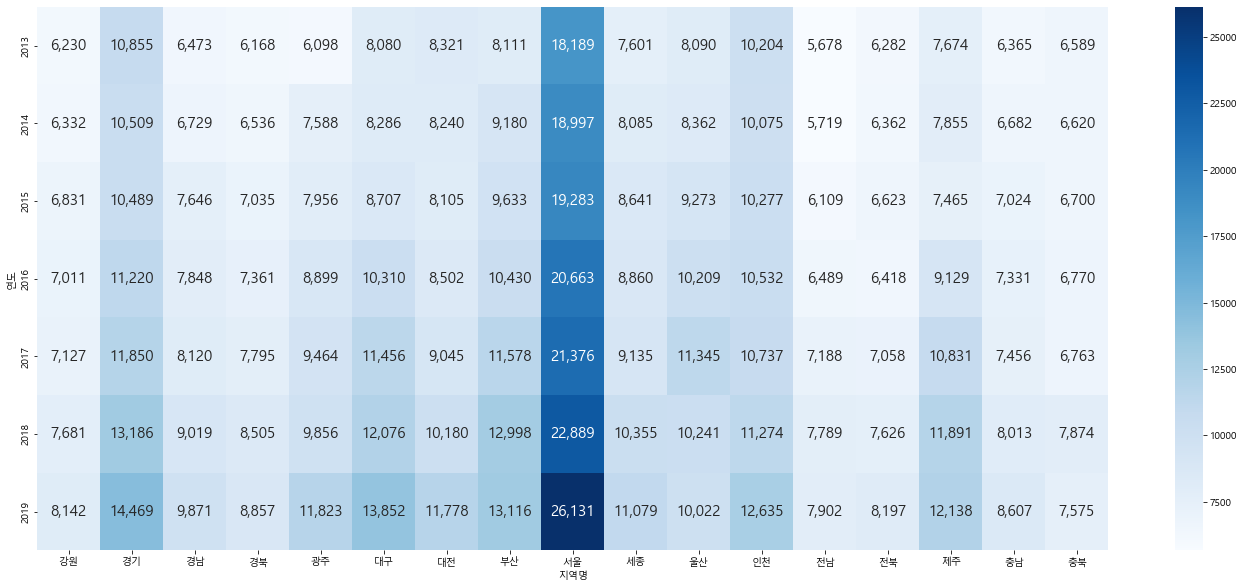

In [146]:
# 위에서 그린 피봇테이블을 히트맵으로 표현해 봅니다.
# fmt에 '.0f'를 지정하면 정수로 출력할 수 있다 (설정하지 않으면 값이 클 경우 e로 출력)
# annot_kws를 사용해 글씨 크기를 설정할 수 있다
# 1000단위 마다 콤마(,)를 찍고 싶다면 fmt속성에 ',.0f'를 지정하면 된다

plt.figure(figsize = (24,10))
sns.heatmap(t, annot = True, cmap='Blues', fmt = ',.0f', annot_kws={'size':15})


In [147]:
# transpose 를 사용하면 행과 열을 바꿔줄 수 있습니다.
t.T
t.transpose()

연도,2013,2014,2015,2016,2017,2018,2019
지역명,,,,,,,
강원,6230.0,6332.0,6831.0,7011.0,7127.0,7681.0,8142.0
경기,10855.0,10509.0,10489.0,11220.0,11850.0,13186.0,14469.0
경남,6473.0,6729.0,7646.0,7848.0,8120.0,9019.0,9871.0
경북,6168.0,6536.0,7035.0,7361.0,7795.0,8505.0,8857.0
광주,6098.0,7588.0,7956.0,8899.0,9464.0,9856.0,11823.0
대구,8080.0,8286.0,8707.0,10310.0,11456.0,12076.0,13852.0
대전,8321.0,8240.0,8105.0,8502.0,9045.0,10180.0,11778.0
부산,8111.0,9180.0,9633.0,10430.0,11578.0,12998.0,13116.0
서울,18189.0,18997.0,19283.0,20663.0,21376.0,22889.0,26131.0


<AxesSubplot:xlabel='연도', ylabel='지역명'>

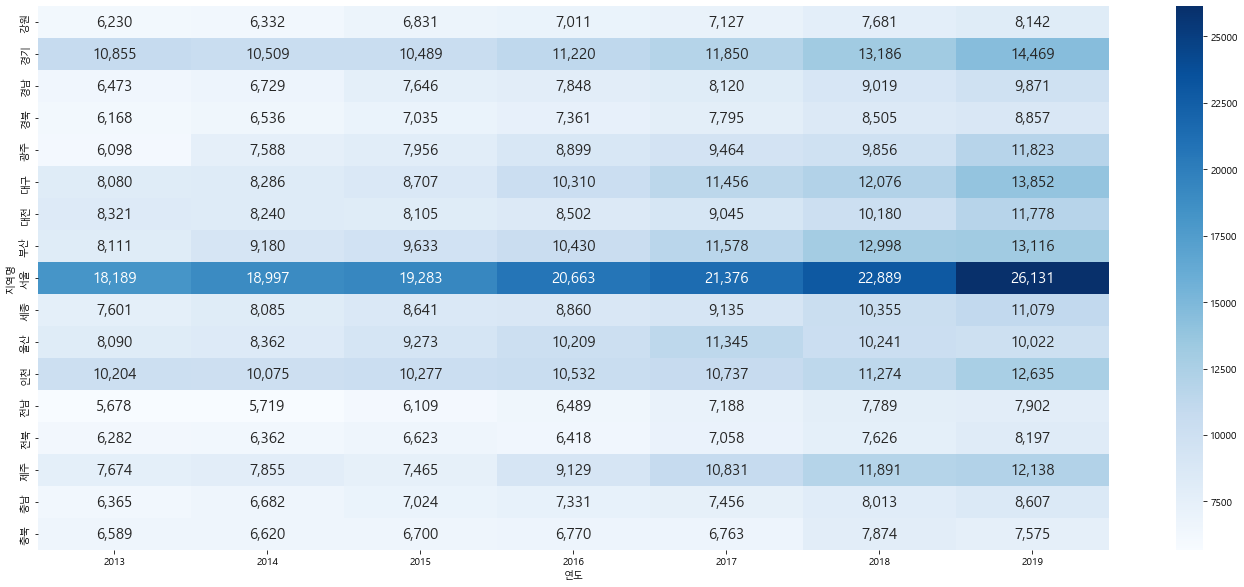

In [148]:
# 바뀐 행과 열을 히트맵으로 표현해 봅니다.
plt.figure(figsize=(24,10))
sns.heatmap(t.T, cmap='Blues', annot = True, annot_kws = {'size':15}, fmt = ',.0f')


In [149]:
# Groupby로 그려봅니다. 인덱스에 ["연도", "지역명"] 을 넣고 그려봅니다.
df.groupby(['연도','지역명'])['평당분양가격'].mean().unstack().round()


지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.0,10855.0,6473.0,6168.0,6098.0,8080.0,8321.0,8111.0,18189.0,7601.0,8090.0,10204.0,5678.0,6282.0,7674.0,6365.0,6589.0
2014,6332.0,10509.0,6729.0,6536.0,7588.0,8286.0,8240.0,9180.0,18997.0,8085.0,8362.0,10075.0,5719.0,6362.0,7855.0,6682.0,6620.0
2015,6831.0,10489.0,7646.0,7035.0,7956.0,8707.0,8105.0,9633.0,19283.0,8641.0,9273.0,10277.0,6109.0,6623.0,7465.0,7024.0,6700.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7127.0,11850.0,8120.0,7795.0,9464.0,11456.0,9045.0,11578.0,21376.0,9135.0,11345.0,10737.0,7188.0,7058.0,10831.0,7456.0,6763.0
2018,7681.0,13186.0,9019.0,8505.0,9856.0,12076.0,10180.0,12998.0,22889.0,10355.0,10241.0,11274.0,7789.0,7626.0,11891.0,8013.0,7874.0
2019,8142.0,14469.0,9871.0,8857.0,11823.0,13852.0,11778.0,13116.0,26131.0,11079.0,10022.0,12635.0,7902.0,8197.0,12138.0,8607.0,7575.0


## 2013년부터 최근 데이터까지 시각화하기
### 연도별 평당분양가격 보기

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

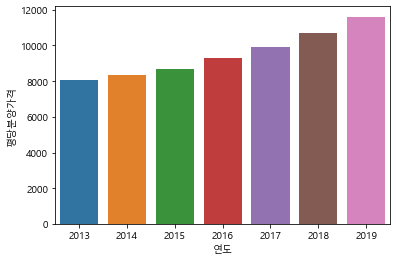

In [150]:
# barplot 으로 연도별 평당분양가격 그리기
sns.barplot(data=df,x='연도',y='평당분양가격',ci=None)

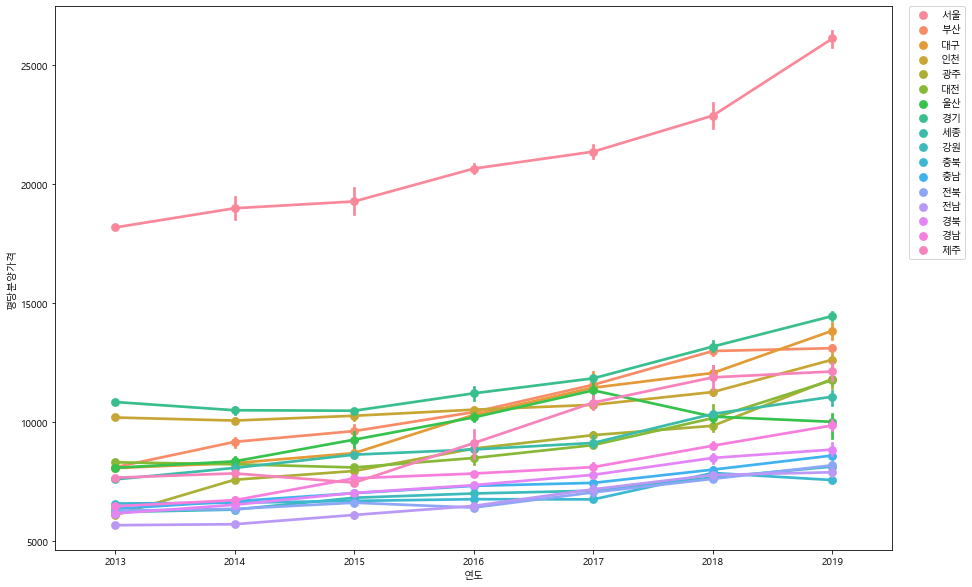

In [151]:
# pointplot 으로 연도별 평당분양가격 그리기
plt.figure(figsize = (15,10))
sns.pointplot(data = df, x= '연도', y = '평당분양가격', hue = '지역명')
plt.legend(bbox_to_anchor = (1.02,1), loc=2, borderaxespad=0.)

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

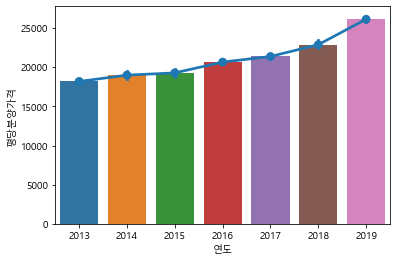

In [152]:
# 서울만 barplot 으로 그리기
sns.barplot(data = df[df['지역명'] == '서울'], x='연도',y='평당분양가격', ci = None)
sns.pointplot(data = df[df['지역명'] == '서울'], x='연도',y='평당분양가격')

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

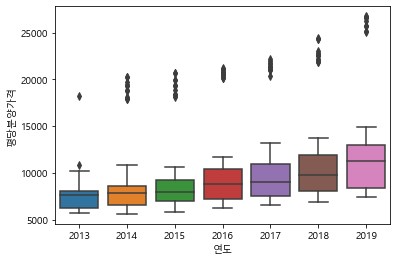

In [153]:
# 연도별 평당분양가격 boxplot 그리기
sns.boxplot(data=df, x='연도', y='평당분양가격')


<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

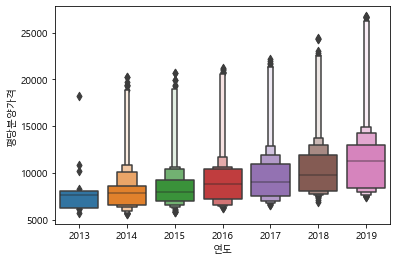

In [154]:
sns.boxenplot(data=df, x="연도", y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

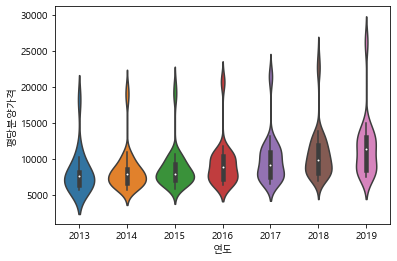

In [155]:
# 연도별 평당분양가격 violinplot 그리기
sns.violinplot(data=df, x='연도', y='평당분양가격')


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


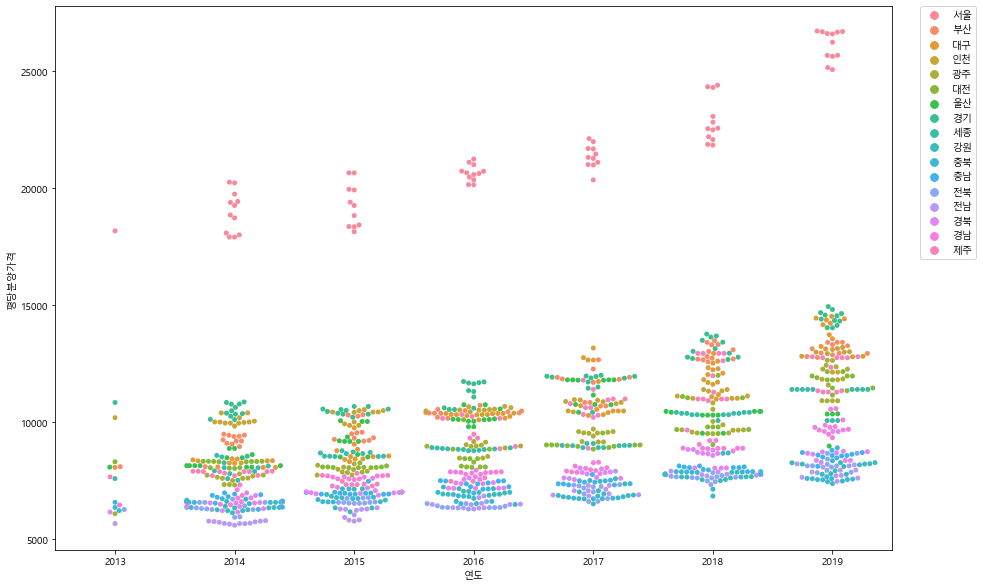

In [168]:
# 연도별 평당분양가격 swarmplot 그리기
plt.figure(figsize=(15,10))
sns.swarmplot(data = df, x = '연도', y = '평당분양가격', hue = '지역명')
plt.legend(bbox_to_anchor=(1.1,1), loc=1, borderaxespad=0.)

### 지역별 평당분양가격 보기

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

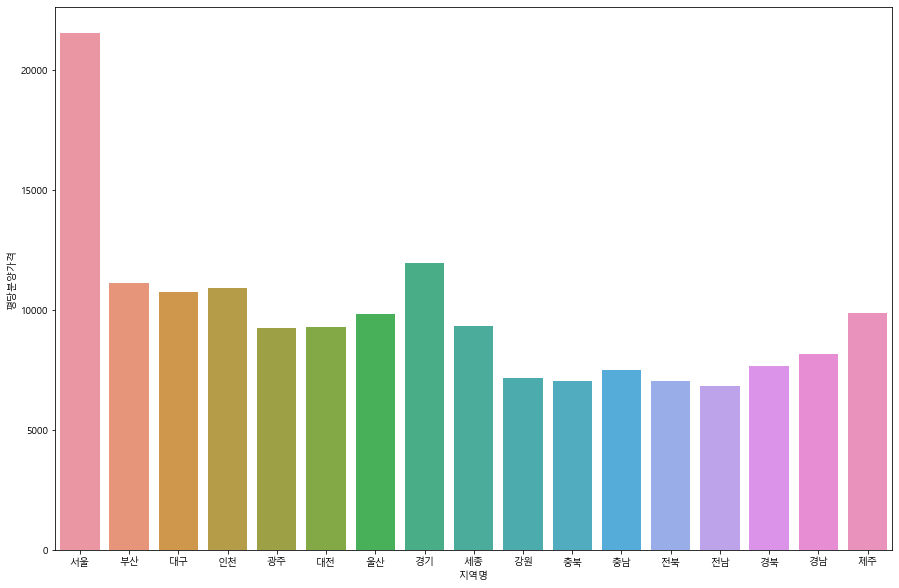

In [170]:
# barplot 으로 지역별 평당분양가격을 그려봅니다.
plt.figure(figsize=(15,10))
sns.barplot(data=df, x = '지역명', y = '평당분양가격', ci = None)


<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

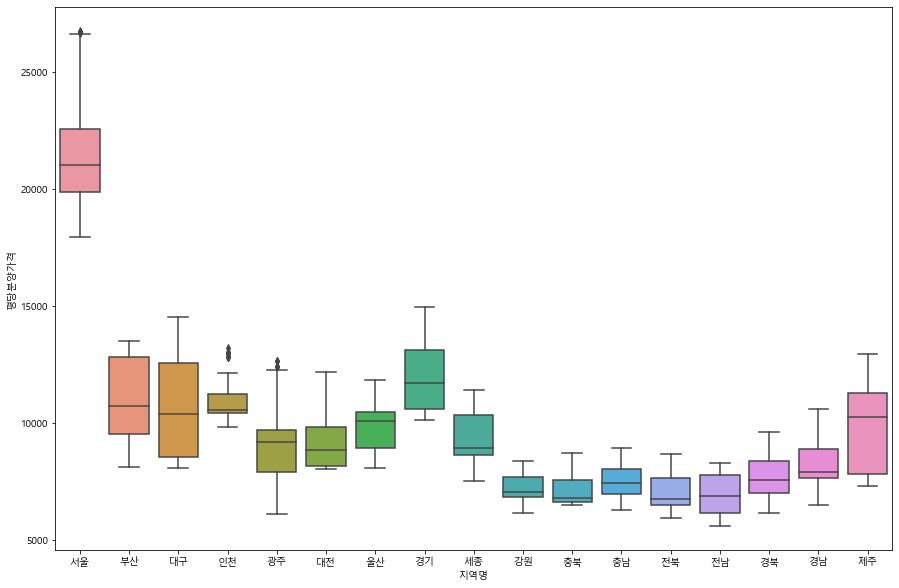

In [172]:
# boxplot 으로 지역별 평당분양가격을 그려봅니다.
plt.figure(figsize=(15,10))
sns.boxplot(data=df, x = '지역명', y = '평당분양가격')


<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

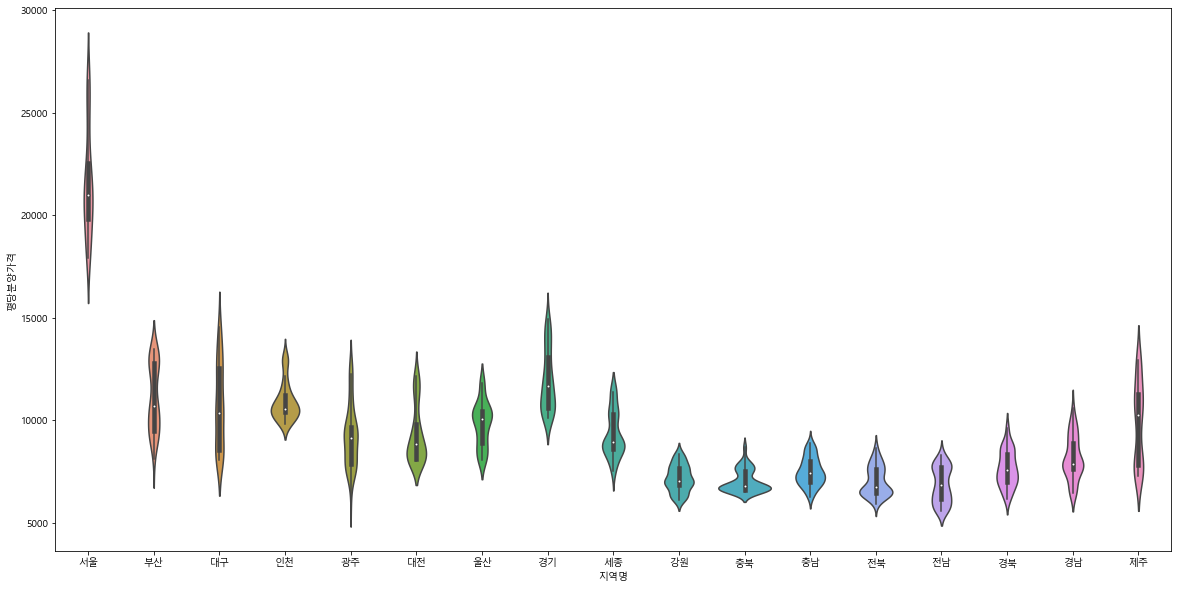

In [177]:
# violinplot 으로 지역별 평당분양가격을 그려봅니다.
plt.figure(figsize=(20,10))
sns.violinplot(data = df, x = '지역명', y = '평당분양가격')

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 26.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points 

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

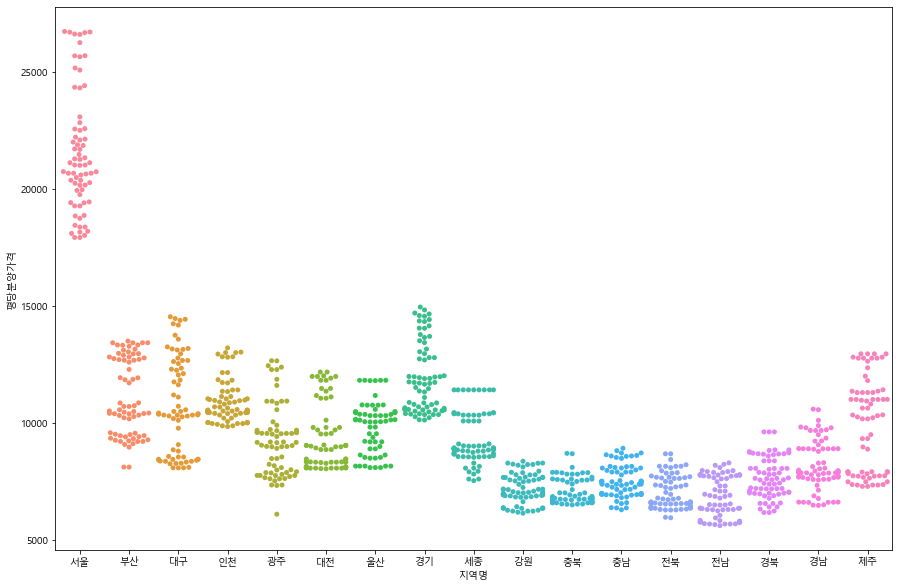

In [180]:
# swarmplot 으로 지역별 평당분양가격을 그려봅니다.
plt.figure(figsize=(15,10))
sns.swarmplot(data = df, x = '지역명', y = '평당분양가격')
